# Simulate Thompson Sampling

Example Dataset: 

(1)ROC_AUC_SCORE: calculated between true labels and predictions for each iterations  
(2)Cumulative gain: for each iteration, if the maximum prediction corresponding with the valid labels gain 1, otherwise 0. Show cumulative gain for all iterations.

There are two settings for labelling:  
(a). repeated labelling: allow one instance to be labelled more than once   
(b). unrepeated labelling: otherwise

Two settings for recommendation:  
(I). Random Sampling (RS)  
(II). Thompson Sampling (TS)


I used [NATIONS](https://github.com/dongwookim-ml/kg-data) dataset as an example, there are totally 2,024 valid triples. For (b), it doesn't make sense if we sample more than 2,024 times. So I chose test 2,000 iterations for (b). And more iterations (5000) for repeated labelling.

Experiment 1: unrepeated labelling + 2000 iterations 

Experiment 2: repeated labelling + 5000 iterations


In [1]:
# direct to parent folder
import sys
#sys.path.append("..")

from acton.database import LabelOnlyASCIIReader, LabelOnlyManagedHDF5Database
from acton.predictors import TensorPredictor
from acton.recommenders import ThompsonSamplingRecommender
from acton.labellers import LabelOnlyDatabaseLabeller
import acton.acton
import tempfile
import astropy.io.ascii as io_ascii
import os.path
import numpy
import logging
import matplotlib.pyplot as plt
import pickle

/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
logging.basicConfig(level = logging.DEBUG)

_path = 'tests/kg-data/nation/triples.txt'
output_path = 'acton/acton.proto'
n_dim = 10
TS= 0.0
RANDOM = 1.0

In [3]:
with LabelOnlyASCIIReader(_path, n_dim) as reader:
    n_relations = reader.n_relations
    n_entities = reader.n_entities
    totoal_size = n_relations * n_entities * n_entities
    ids = numpy.arange(totoal_size)
    
    # repeated labelling
    N_EPOCHS = 5000
    repeated_labelling = True
    
    results = {}

    # TS 
    results['TS_repeated_train_error_list'], results['TS_repeated_test_error_list'],\
    results['TS_repeated_gain'] =  acton.acton.simulate_active_learning(ids, reader, {}, output_path, 
                                                                        n_epochs= N_EPOCHS,
                                                                        recommender='ThompsonSamplingRecommender',
                                                                        predictor= 'TensorPredictor',
                                                                        labeller= 'LabelOnlyDatabaseLabeller',
                                                                        diversity= TS, 
                                                                        repeated_labelling = repeated_labelling)
    # Random 
    results['RD_repeated_train_error_list'], results['RD_repeated_test_error_list'],\
    results['RD_repeated_gain'] =  acton.acton.simulate_active_learning(ids, reader, {}, output_path, 
                                                                        n_epochs= N_EPOCHS,
                                                                        recommender='ThompsonSamplingRecommender',
                                                                        predictor= 'TensorPredictor',
                                                                        labeller= 'LabelOnlyDatabaseLabeller',
                                                                        diversity= RANDOM,
                                                                        repeated_labelling = repeated_labelling)
    # unrepeated labelling
    N_EPOCHS = 2000
    repeated_labelling = False
    
    # TS 
    results['TS_unrepeated_train_error_list'], results['TS_unrepeated_test_error_list'],\
    results['TS_unrepeated_gain'] = acton.acton.simulate_active_learning(ids, reader, {}, output_path, 
                                                                        n_epochs= N_EPOCHS,
                                                                        recommender='ThompsonSamplingRecommender',
                                                                        predictor= 'TensorPredictor',
                                                                        labeller= 'LabelOnlyDatabaseLabeller',
                                                                        diversity= TS, 
                                                                        repeated_labelling = repeated_labelling)
    # Random 
    results['RD_unrepeated_train_error_list'], results['RD_unrepeated_test_error_list'],\
    results['RD_unrepeated_gain'] = acton.acton.simulate_active_learning(ids, reader, {}, output_path, 
                                                                        n_epochs= N_EPOCHS,
                                                                        recommender='ThompsonSamplingRecommender',
                                                                        predictor= 'TensorPredictor',
                                                                        labeller= 'LabelOnlyDatabaseLabeller',
                                                                        diversity= RANDOM,
                                                                        repeated_labelling = repeated_labelling)

DEBUG:root:New feature E array size: (5, 14, 10)
DEBUG:root:New feature R array size: (5, 56, 10, 10)
DEBUG:root:New label array size: (56, 14, 14)
DEBUG:root:Found 10976 instances.
DEBUG:root:Splitting into training/testing sets.
DEBUG:root:Drawing initial labels.
DEBUG:root:Recommending: [(42, 11, 0), (22, 1, 10), (42, 3, 9), (46, 0, 3), (48, 8, 5), (43, 8, 7), (48, 0, 10), (11, 4, 0), (47, 9, 4), (28, 12, 5)]
DEBUG:root:Writing protobufs to acton/acton.proto.
INFO:root:Epoch 1/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.12 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8770).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 4, 4)]
INFO:root:Epoch 2/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pred

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8757).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 6, 12)]
INFO:root:Epoch 20/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.23 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8757).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 2, 11)]
INFO:root:Epoch 21/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.24 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8757).
DEBUG:root:(Took 0.000

INFO:root:Epoch 39/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.34 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8743).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 13, 13)]
INFO:root:Epoch 40/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.35 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 8742).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 2, 2)]
INFO:root:Epoch 41/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DE

DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8727).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 8, 8)]
INFO:root:Epoch 59/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8726).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 1, 2)]
INFO:root:Epoch 60/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8726).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Re

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8711).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 8, 5)]
INFO:root:Epoch 79/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8710).
DEBUG:root:(Took 0.0003 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 7, 3)]
INFO:root:Epoch 80/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference,

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 5, 11)]
INFO:root:Epoch 98/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8694).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 1, 12)]
INFO:root:Epoch 99/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8693).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 3, 10)]
INFO:root:Epoch 100/5000
DEBUG:root:Labelling recommendat

DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8681).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 7, 5)]
INFO:root:Epoch 118/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8680).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 2, 12)]
INFO:root:Epoch 119/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Makin

INFO:root:Epoch 137/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8664).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 4, 4)]
INFO:root:Epoch 138/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8663).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 9, 3)]
INFO:root:Epoch 139/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
D

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8647).
DEBUG:root:(Took 0.00047 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 8, 1)]
INFO:root:Epoch 157/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 8646).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 7, 7)]
INFO:root:Epoch 158/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8645).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Re

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8631).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 9, 9)]
INFO:root:Epoch 177/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8630).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 9, 0)]
INFO:root:Epoch 178/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 8, 8)]
INFO:root:Epoch 196/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 8617).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 13)]
INFO:root:Epoch 197/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 8616).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 5, 2)]
INFO:root:Epoch 198/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting l

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8601).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 12, 9)]
INFO:root:Epoch 216/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8600).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 0, 0)]
INFO:root:Epoch 217/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00032 s.)
DEBUG:root:Making predictions (unlabelled, n = 8600).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.


DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8589).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 11, 11)]
INFO:root:Epoch 236/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 2 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8588).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 5, 9)]
INFO:root:Epoch 237/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (refere

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 7, 3)]
INFO:root:Epoch 255/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8573).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 8, 4)]
INFO:root:Epoch 256/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8573).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 11, 11)]
INFO:root:Epoch 257/5000
DEBUG:root:Labelling recommend

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8557).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 12, 12)]
INFO:root:Epoch 275/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8556).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 2, 12)]
INFO:root:Epoch 276/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8555).
DEBUG:root:(Took 0.0

DEBUG:root:Recommending: [(41, 4, 2)]
INFO:root:Epoch 294/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 8541).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 13, 9)]
INFO:root:Epoch 295/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8541).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 8, 12)]
INFO:root:Epoch 296/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 

DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8528).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 2, 3)]
INFO:root:Epoch 314/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making predictions (unlabelled, n = 8527).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 9, 7)]
INFO:root:Epoch 315/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8526).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8510).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 7, 12)]
INFO:root:Epoch 334/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8509).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 12, 4)]
INFO:root:Epoch 335/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 11, 12)]
INFO:root:Epoch 353/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8492).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 12, 3)]
INFO:root:Epoch 354/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8491).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 2, 2)]
INFO:root:Epoch 355/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label ID

DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8474).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 3, 6)]
INFO:root:Epoch 373/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8473).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 6, 12)]
INFO:root:Epoch 374/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8472).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 11, 0)]
INFO:ro

DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8457).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 0, 11)]
INFO:root:Epoch 393/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8456).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 0, 1)]
INFO:root:Epoch 394/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8455).

DEBUG:root:Recommending: [(42, 10, 13)]
INFO:root:Epoch 412/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8441).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 3, 3)]
INFO:root:Epoch 413/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8440).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 13, 13)]
INFO:root:Epoch 414/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predi

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8425).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 11)]
INFO:root:Epoch 432/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8425).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 6, 6)]
INFO:root:Epoch 433/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8424).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 0, 0)]
INFO:

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8409).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 11, 13)]
INFO:root:Epoch 452/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8408).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 11, 7)]
INFO:root:Epoch 453/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 11, 4)]
INFO:root:Epoch 471/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 1 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8390).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 11, 11)]
INFO:root:Epoch 472/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8390).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 7, 13)]
INFO:root:Epoch 473/5000
DEBUG:root:Labelling recomme

DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8377).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 8, 12)]
INFO:root:Epoch 491/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8377).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 12, 12)]
INFO:root:Epoch 492/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8362).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 3, 4)]
INFO:root:Epoch 511/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 1 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8361).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 4)]
INFO:root:Epoch 512/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)


DEBUG:root:Making predictions (unlabelled, n = 8349).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 0, 0)]
INFO:root:Epoch 530/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8348).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 2, 2)]
INFO:root:Epoch 531/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8347).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 13, 12)]
IN

DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8334).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 11, 12)]
INFO:root:Epoch 550/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8333).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 0, 0)]
INFO:root:Epoch 551/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 833

DEBUG:root:Recommending: [(42, 4, 12)]
INFO:root:Epoch 569/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8321).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 13)]
INFO:root:Epoch 570/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8320).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 13, 4)]
INFO:root:Epoch 571/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8304).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 1)]
INFO:root:Epoch 589/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8303).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 9)]
INFO:root:Epoch 590/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 830

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8288).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 11, 12)]
INFO:root:Epoch 609/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8287).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 9, 6)]
INFO:root:Epoch 610/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (refer

DEBUG:root:Making predictions (unlabelled, n = 8276).
DEBUG:root:(Took 0.0014 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 3, 9)]
INFO:root:Epoch 628/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8275).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 11, 13)]
INFO:root:Epoch 629/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 2 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 8275).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 11)]
INF

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8265).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 3, 5)]
INFO:root:Epoch 648/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 8264).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 10)]
INFO:root:Epoch 649/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (refer

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 13, 11)]
INFO:root:Epoch 667/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8253).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 11)]
INFO:root:Epoch 668/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making predictions (unlabelled, n = 8252).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 2, 13)]
INFO:root:Epoch 669/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting 

DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8238).
DEBUG:root:(Took 0.00054 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 4, 4)]
INFO:root:Epoch 687/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8237).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 12)]
INFO:root:Epoch 688/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8236).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:

DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8222).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 12, 1)]
INFO:root:Epoch 707/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8222).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 12)]
INFO:root:Epoch 708/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 

INFO:root:Epoch 726/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8209).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 8, 12)]
INFO:root:Epoch 727/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making predictions (unlabelled, n = 8208).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 10, 12)]
INFO:root:Epoch 728/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:

DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 3, 5)]
INFO:root:Epoch 746/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 8194).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 1)]
INFO:root:Epoch 747/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8193).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 12, 6)]
INFO:root:Epoch 748/5000
DEBUG:root:Labelling recommendat

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8181).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 8, 13)]
INFO:root:Epoch 766/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8180).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 3, 9)]
INFO:root:Epoch 767/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making predictions (unlabelled, n = 8180).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8170).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 5)]
INFO:root:Epoch 786/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8169).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 5)]
INFO:root:Epoch 787/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8

INFO:root:Epoch 805/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8155).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 13)]
INFO:root:Epoch 806/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 8154).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 4, 12)]
INFO:root:Epoch 807/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:

INFO:root:Epoch 825/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8140).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 1, 12)]
INFO:root:Epoch 826/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8140).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 6, 2)]
INFO:root:Epoch 827/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
D

DEBUG:root:Making predictions (unlabelled, n = 8125).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 6, 7)]
INFO:root:Epoch 845/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8125).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 11, 5)]
INFO:root:Epoch 846/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8125).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 11, 12)]
INFO:root:Epoch 847/5000
DEBUG:roo

DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8114).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 2, 11)]
INFO:root:Epoch 865/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8113).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 7, 12)]
INFO:root:Epoch 866/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8113).
DEBUG:root:(Took 0.0005 s.)
DEBUG:root:Making recommendations.
DEBUG:root:

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8103).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 12)]
INFO:root:Epoch 885/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8103).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 11)]
INFO:root:Epoch 886/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making p

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8090).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 12)]
INFO:root:Epoch 905/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8090).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 3, 9)]
INFO:root:Epoch 906/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (re

DEBUG:root:Recommending: [(6, 12, 3)]
INFO:root:Epoch 924/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8080).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 12)]
INFO:root:Epoch 925/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 1 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8080).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 8)]
INFO:root:Epoch 926/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 9, 3)]
INFO:root:Epoch 944/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8069).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 2, 4)]
INFO:root:Epoch 945/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8068).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 4, 12)]
INFO:root:Epoch 946/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label ID

DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 8058).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 1, 12)]
INFO:root:Epoch 964/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 8058).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 5, 12)]
INFO:root:Epoch 965/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8058).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 5)]
INFO

DEBUG:root:Making predictions (unlabelled, n = 8051).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 11)]
INFO:root:Epoch 984/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8051).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 11, 13)]
INFO:root:Epoch 985/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8050).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 0, 3)]
I

DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8039).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 3)]
INFO:root:Epoch 1004/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8038).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 10)]
INFO:root:Epoch 1005/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Ma

INFO:root:Epoch 1023/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8028).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 12)]
INFO:root:Epoch 1024/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8027).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 3, 0)]
INFO:root:Epoch 1025/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference,

DEBUG:root:Recommending: [(41, 5, 12)]
INFO:root:Epoch 1043/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8018).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 3, 2)]
INFO:root:Epoch 1044/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8017).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 1045/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pred

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 0, 5)]
INFO:root:Epoch 1063/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8006).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 13)]
INFO:root:Epoch 1064/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8006).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 12)]
INFO:root:Epoch 1065/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pre

DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7998).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 0, 7)]
INFO:root:Epoch 1083/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7998).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 5)]
INFO:root:Epoch 1084/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7998).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 6, 13)]
INFO

DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7986).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 8, 13)]
INFO:root:Epoch 1103/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7985).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 13)]
INFO:root:Epoch 1104/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7985).
DEBUG:root:(Took 0.00067 s

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7975).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 11, 12)]
INFO:root:Epoch 1123/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7974).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 3, 3)]
INFO:root:Epoch 1124/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (refe

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7962).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 4, 12)]
INFO:root:Epoch 1143/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00022 s.)
DEBUG:root:Making predictions (unlabelled, n = 7961).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 10, 8)]
INFO:root:Epoch 1144/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (

DEBUG:root:Recommending: [(44, 11, 5)]
INFO:root:Epoch 1162/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7951).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 11, 12)]
INFO:root:Epoch 1163/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7950).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 12, 3)]
INFO:root:Epoch 1164/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 11, 12)]
INFO:root:Epoch 1182/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7944).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 9)]
INFO:root:Epoch 1183/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7944).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 5, 13)]
INFO:root:Epoch 1184/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorti

DEBUG:root:Making predictions (unlabelled, n = 7936).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 10)]
INFO:root:Epoch 1202/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 7935).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 7, 7)]
INFO:root:Epoch 1203/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7935).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 12, 4)]
INFO:root:Epoch 1204/5000
DEBUG

DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7928).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 4, 12)]
INFO:root:Epoch 1222/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7927).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 5)]
INFO:root:Epoch 1223/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7926).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:ro

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00054 s.)
DEBUG:root:Making predictions (unlabelled, n = 7920).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 12, 3)]
INFO:root:Epoch 1242/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7920).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 13, 6)]
INFO:root:Epoch 1243/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n =

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7913).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 9, 5)]
INFO:root:Epoch 1262/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7912).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 9)]
INFO:root:Epoch 1263/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7904).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 12, 4)]
INFO:root:Epoch 1282/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7903).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 6)]
INFO:root:Epoch 1283/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 9, 11)]
INFO:root:Epoch 1301/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.47 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7894).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 7)]
INFO:root:Epoch 1302/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 2 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7893).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 2, 4)]
INFO:root:Epoch 1303/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting

DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7884).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 4)]
INFO:root:Epoch 1321/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7883).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 3, 12)]
INFO:root:Epoch 1322/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7882).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 7)]
IN

DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7874).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 3, 1)]
INFO:root:Epoch 1341/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 1 0 2]
DEBUG:root:(Took 0.47 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 7874).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 10)]
INFO:root:Epoch 1342/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7873).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:ro

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7865).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 1, 12)]
INFO:root:Epoch 1361/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7864).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 9)]
INFO:root:Epoch 1362/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7864).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7856).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 11, 12)]
INFO:root:Epoch 1381/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7855).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 6, 3)]
INFO:root:Epoch 1382/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making pr

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7847).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 12, 2)]
INFO:root:Epoch 1401/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7847).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 12)]
INFO:root:Epoch 1402/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 7)]
INFO:root:Epoch 1420/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7841).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 10, 6)]
INFO:root:Epoch 1421/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7841).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 3, 12)]
INFO:root:Epoch 1422/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sortin

DEBUG:root:Recommending: [(42, 1, 12)]
INFO:root:Epoch 1440/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7833).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 5)]
INFO:root:Epoch 1441/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7833).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 1)]
INFO:root:Epoch 1442/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 

DEBUG:root:Recommending: [(44, 4, 13)]
INFO:root:Epoch 1460/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7824).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 4, 12)]
INFO:root:Epoch 1461/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making predictions (unlabelled, n = 7824).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 7, 10)]
INFO:root:Epoch 1462/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0

INFO:root:Epoch 1480/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7814).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 11, 12)]
INFO:root:Epoch 1481/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7814).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 10, 13)]
INFO:root:Epoch 1482/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 

DEBUG:root:Recommending: [(38, 5, 13)]
INFO:root:Epoch 1500/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7806).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 2, 9)]
INFO:root:Epoch 1501/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7805).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 10)]
INFO:root:Epoch 1502/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 2, 5)]
INFO:root:Epoch 1520/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7792).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 4, 12)]
INFO:root:Epoch 1521/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7792).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 10, 9)]
INFO:root:Epoch 1522/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label I

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 11, 9)]
INFO:root:Epoch 1540/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7784).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 10, 12)]
INFO:root:Epoch 1541/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7783).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 12)]
INFO:root:Epoch 1542/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting p

DEBUG:root:Recommending: [(47, 5, 13)]
INFO:root:Epoch 1560/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7776).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 12)]
INFO:root:Epoch 1561/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7776).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 2, 6)]
INFO:root:Epoch 1562/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 12, 3)]
INFO:root:Epoch 1580/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7770).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 1, 12)]
INFO:root:Epoch 1581/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7770).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 2)]
INFO:root:Epoch 1582/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting la

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 12)]
INFO:root:Epoch 1600/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7765).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 12)]
INFO:root:Epoch 1601/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0002 s.)
DEBUG:root:Making predictions (unlabelled, n = 7765).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 13)]
INFO:root:Epoch 1602/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting l

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 5)]
INFO:root:Epoch 1620/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7758).
DEBUG:root:(Took 0.00049 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 5, 2)]
INFO:root:Epoch 1621/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7757).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 1, 9)]
INFO:root:Epoch 1622/5000
DEBUG:root:Labelling recomme

DEBUG:root:Making predictions (unlabelled, n = 7752).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 10, 13)]
INFO:root:Epoch 1640/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7752).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 0)]
INFO:root:Epoch 1641/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7751).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 2

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7743).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 7)]
INFO:root:Epoch 1660/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7742).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 12)]
INFO:root:Epoch 1661/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7742).
DEBUG:root:(Took 0.00066 s

DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7735).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 7, 9)]
INFO:root:Epoch 1680/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7734).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 6)]
INFO:root:Epoch 1681/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Ma

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7732).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 3, 4)]
INFO:root:Epoch 1700/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7731).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 4, 0)]
INFO:root:Epoch 1701/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (referen

INFO:root:Epoch 1719/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7727).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 4, 13)]
INFO:root:Epoch 1720/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7727).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 11, 0)]
INFO:root:Epoch 1721/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:

DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 0, 7)]
INFO:root:Epoch 1739/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7718).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 6)]
INFO:root:Epoch 1740/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7718).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 10, 13)]
INFO:root:Epoch 1741/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting la

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 13)]
INFO:root:Epoch 1759/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7711).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 13)]
INFO:root:Epoch 1760/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7711).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 9, 11)]
INFO:root:Epoch 1761/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorti

DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 5)]
INFO:root:Epoch 1779/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7703).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 4, 13)]
INFO:root:Epoch 1780/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7702).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 13, 3)]
INFO:root:Epoch 1781/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting la

DEBUG:root:Making predictions (unlabelled, n = 7692).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 12)]
INFO:root:Epoch 1799/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7692).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 12)]
INFO:root:Epoch 1800/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7692).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 9, 2)]
INFO:root:Epoch 1801/5000
DEBUG:

DEBUG:root:Making predictions (unlabelled, n = 7686).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 12)]
INFO:root:Epoch 1819/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00028 s.)
DEBUG:root:Making predictions (unlabelled, n = 7686).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 13)]
INFO:root:Epoch 1820/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 1 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7686).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 4, 9)]
INFO:root:Epoch 1821/5000
DEBUG:

DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7679).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 6)]
INFO:root:Epoch 1839/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 1 2]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7679).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 12)]
INFO:root:Epoch 1840/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.48 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7679).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 2, 5)]
INFO

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7674).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 10, 12)]
INFO:root:Epoch 1859/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.52 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7673).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 10, 12)]
INFO:root:Epoch 1860/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.52 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7672).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommen

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7668).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 1879/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:(Took 0.47 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7668).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 13)]
INFO:root:Epoch 1880/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7668).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recomm

DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7664).
DEBUG:root:(Took 0.00044 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 11, 0)]
INFO:root:Epoch 1899/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7663).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 3, 3)]
INFO:root:Epoch 1900/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7660).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 9, 3)]
INFO:root:Epoch 1919/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7659).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 0)]
INFO:root:Epoch 1920/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7659).
DEBUG:root:(Took 0.00076 s.)


DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7652).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 13)]
INFO:root:Epoch 1939/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7652).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 9, 5)]
INFO:root:Epoch 1940/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7647).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 12, 4)]
INFO:root:Epoch 1959/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7647).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 12, 2)]
INFO:root:Epoch 1960/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:(Took 0.45 

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 5, 9)]
INFO:root:Epoch 1978/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7640).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 3, 1)]
INFO:root:Epoch 1979/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7640).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 5, 11)]
INFO:root:Epoch 1980/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pred

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 1, 13)]
INFO:root:Epoch 1998/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7635).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 13)]
INFO:root:Epoch 1999/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7635).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 13)]
INFO:root:Epoch 2000/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting 

DEBUG:root:Making predictions (unlabelled, n = 7626).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 9)]
INFO:root:Epoch 2018/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7626).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 2019/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7626).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 13, 10)]
INFO:root:Epoch 2020/5000
DEBUG

DEBUG:root:Making predictions (unlabelled, n = 7623).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 5, 13)]
INFO:root:Epoch 2038/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7623).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 10, 7)]
INFO:root:Epoch 2039/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7622).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 8, 13)]
INFO:root:Epoch 2040/5000
DEBUG:

DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 2)]
INFO:root:Epoch 2058/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7618).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 5)]
INFO:root:Epoch 2059/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 2 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7617).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 13)]
INFO:root:Epoch 2060/5000
DEBUG:root:Labelling recom

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7609).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 5)]
INFO:root:Epoch 2078/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7609).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 9)]
INFO:root:Epoch 2079/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7609).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 2, 10)]
IN

DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 13)]
INFO:root:Epoch 2098/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7603).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 6, 13)]
INFO:root:Epoch 2099/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7602).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 4, 13)]
INFO:root:Epoch 2100/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting labe

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 5)]
INFO:root:Epoch 2118/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7598).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 13, 5)]
INFO:root:Epoch 2119/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7598).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 5)]
INFO:root:Epoch 2120/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 2, 9)]
INFO:root:Epoch 2138/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7592).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 2, 5)]
INFO:root:Epoch 2139/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7591).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 5, 12)]
INFO:root:Epoch 2140/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting 

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 7)]
INFO:root:Epoch 2158/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7586).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 10, 12)]
INFO:root:Epoch 2159/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7586).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 2160/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 8, 2)]
INFO:root:Epoch 2178/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7582).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 13)]
INFO:root:Epoch 2179/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7582).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 2, 5)]
INFO:root:Epoch 2180/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting

DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 7, 11)]
INFO:root:Epoch 2198/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7576).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 12, 4)]
INFO:root:Epoch 2199/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 7575).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 6, 5)]
INFO:root:Epoch 2200/5000
DEBUG:root:Labelling recomme

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 10, 0)]
INFO:root:Epoch 2218/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7573).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 13)]
INFO:root:Epoch 2219/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7573).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 3, 13)]
INFO:root:Epoch 2220/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 11, 13)]
INFO:root:Epoch 2238/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7569).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 10, 12)]
INFO:root:Epoch 2239/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7569).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 5, 9)]
INFO:root:Epoch 2240/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 8, 12)]
INFO:root:Epoch 2258/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7562).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 9, 2)]
INFO:root:Epoch 2259/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7561).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 12, 5)]
INFO:root:Epoch 2260/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pre

DEBUG:root:Recommending: [(50, 3, 12)]
INFO:root:Epoch 2278/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7557).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 0)]
INFO:root:Epoch 2279/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7557).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 0)]
INFO:root:Epoch 2280/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 1, 13)]
INFO:root:Epoch 2298/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7554).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 8, 12)]
INFO:root:Epoch 2299/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7554).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 2, 6)]
INFO:root:Epoch 2300/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pred

DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 13)]
INFO:root:Epoch 2318/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7551).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 11)]
INFO:root:Epoch 2319/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 2 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7550).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 2320/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting la

DEBUG:root:Making predictions (unlabelled, n = 7546).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 11, 13)]
INFO:root:Epoch 2338/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7546).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 6, 10)]
INFO:root:Epoch 2339/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7545).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 2, 7

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7541).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 4)]
INFO:root:Epoch 2358/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7540).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 5, 13)]
INFO:root:Epoch 2359/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7540).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 10, 12)]
IN

DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 2)]
INFO:root:Epoch 2378/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7537).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 12, 2)]
INFO:root:Epoch 2379/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7537).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 13, 3)]
INFO:root:Epoch 2380/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

INFO:root:Epoch 2398/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7531).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 1, 13)]
INFO:root:Epoch 2399/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7531).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 11)]
INFO:root:Epoch 2400/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG

INFO:root:Epoch 2418/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 7527).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 12)]
INFO:root:Epoch 2419/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7527).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 2, 5)]
INFO:root:Epoch 2420/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7523).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 13)]
INFO:root:Epoch 2439/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7523).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 2, 12)]
INFO:root:Epoch 2440/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions 

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7521).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 9, 11)]
INFO:root:Epoch 2459/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7521).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 3, 12)]
INFO:root:Epoch 2460/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making pr

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 7516).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 2479/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7516).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 12, 3)]
INFO:root:Epoch 2480/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making pr

DEBUG:root:[RESAMPLE] [0 1 0 1 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7515).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 9)]
INFO:root:Epoch 2499/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7515).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 2500/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7515).
DEBUG:root:(Took 0.00071 s.)
D

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7510).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 0)]
INFO:root:Epoch 2519/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7509).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 10)]
INFO:root:Epoch 2520/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7509).
DEBUG:root:(Took 0.

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7506).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 1, 12)]
INFO:root:Epoch 2539/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7506).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 12)]
INFO:root:Epoch 2540/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7506).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 5)]
INF

DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 1, 1)]
INFO:root:Epoch 2559/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7499).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 12, 5)]
INFO:root:Epoch 2560/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 7499).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 10)]
INFO:root:Epoch 2561/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 0, 5)]
INFO:root:Epoch 2579/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7498).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 10, 0)]
INFO:root:Epoch 2580/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7498).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 0)]
INFO:root:Epoch 2581/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 3, 12)]
INFO:root:Epoch 2599/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7492).
DEBUG:root:(Took 0.00034 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 2600/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7492).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 4, 13)]
INFO:root:Epoch 2601/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:Recommending: [(39, 8, 12)]
INFO:root:Epoch 2619/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7488).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 13)]
INFO:root:Epoch 2620/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7488).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 8, 9)]
INFO:root:Epoch 2621/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)


INFO:root:Epoch 2639/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7482).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 13)]
INFO:root:Epoch 2640/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7482).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 2, 13)]
INFO:root:Epoch 2641/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBU

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7479).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 12)]
INFO:root:Epoch 2660/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 0 0 1]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7479).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 1, 12)]
INFO:root:Epoch 2661/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (refe

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making predictions (unlabelled, n = 7477).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 7)]
INFO:root:Epoch 2680/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 1 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7477).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 8, 5)]
INFO:root:Epoch 2681/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7475).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 8, 11)]
INFO:root:Epoch 2700/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 1 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7475).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 2701/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making pr

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7474).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 10, 13)]
INFO:root:Epoch 2720/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7474).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 9)]
INFO:root:Epoch 2721/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7474).
DEBUG:root:(Took 0.00061 s.

DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7471).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 8, 10)]
INFO:root:Epoch 2740/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7471).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 12)]
INFO:root:Epoch 2741/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7471).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 7, 12)]
INF

DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 13)]
INFO:root:Epoch 2760/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 7468).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 1, 5)]
INFO:root:Epoch 2761/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7468).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 5, 13)]
INFO:root:Epoch 2762/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting labe

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 12)]
INFO:root:Epoch 2780/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7464).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 3)]
INFO:root:Epoch 2781/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7463).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 5, 12)]
INFO:root:Epoch 2782/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:Recommending: [(54, 1, 2)]
INFO:root:Epoch 2800/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7460).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 9)]
INFO:root:Epoch 2801/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.53 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7460).
DEBUG:root:(Took 0.00039 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 12)]
INFO:root:Epoch 2802/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.47 s.)


DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7457).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 2821/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7457).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 5, 12)]
INFO:root:Epoch 2822/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7455).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 4, 12)]
INFO:root:Epoch 2841/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7455).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 12)]
INFO:root:Epoch 2842/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7450).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 2, 5)]
INFO:root:Epoch 2861/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7450).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 11)]
INFO:root:Epoch 2862/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 74

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7447).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 2, 0)]
INFO:root:Epoch 2881/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7447).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 5)]
INFO:root:Epoch 2882/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 2 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 74

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7445).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 9)]
INFO:root:Epoch 2901/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7445).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 4, 12)]
INFO:root:Epoch 2902/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n =

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7440).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 12)]
INFO:root:Epoch 2921/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 7440).
DEBUG:root:(Took 0.0013 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 13)]
INFO:root:Epoch 2922/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Maki

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7439).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 12, 8)]
INFO:root:Epoch 2941/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7438).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 12)]
INFO:root:Epoch 2942/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (ref

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7437).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 1, 4)]
INFO:root:Epoch 2961/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7436).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 13)]
INFO:root:Epoch 2962/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7435).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 4)]
INFO:root:Epoch 2981/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7435).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 12)]
INFO:root:Epoch 2982/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 1 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n =

DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7433).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 1, 5)]
INFO:root:Epoch 3001/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7433).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 12)]
INFO:root:Epoch 3002/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7433).
DEBUG:root:(Took 0.00075 s.

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7431).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 3, 12)]
INFO:root:Epoch 3021/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7431).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 12)]
INFO:root:Epoch 3022/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7431).
DEBUG:root:(Took 0

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7428).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 5, 12)]
INFO:root:Epoch 3041/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7428).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 12)]
INFO:root:Epoch 3042/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7428).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 13)]
I

DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 0)]
INFO:root:Epoch 3061/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7427).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 12, 10)]
INFO:root:Epoch 3062/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7427).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 10, 7)]
INFO:root:Epoch 3063/5000
DEBUG:root:Labelling reco

DEBUG:root:Recommending: [(3, 4, 9)]
INFO:root:Epoch 3081/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7424).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 12)]
INFO:root:Epoch 3082/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7424).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 12, 5)]
INFO:root:Epoch 3083/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

INFO:root:Epoch 3101/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7421).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 12)]
INFO:root:Epoch 3102/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7421).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 12)]
INFO:root:Epoch 3103/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBU

INFO:root:Epoch 3121/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7417).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 13)]
INFO:root:Epoch 3122/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 2 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7417).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 8, 9)]
INFO:root:Epoch 3123/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.45 s.)
DEBU

DEBUG:root:Recommending: [(12, 13, 11)]
INFO:root:Epoch 3141/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7413).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 6, 0)]
INFO:root:Epoch 3142/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 7412).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 9, 5)]
INFO:root:Epoch 3143/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pre

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 8, 13)]
INFO:root:Epoch 3161/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7406).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 5, 12)]
INFO:root:Epoch 3162/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7406).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 12, 5)]
INFO:root:Epoch 3163/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting labe

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 0)]
INFO:root:Epoch 3181/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7402).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 5, 0)]
INFO:root:Epoch 3182/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7402).
DEBUG:root:(Took 0.00055 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 4, 13)]
INFO:root:Epoch 3183/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label I

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 0)]
INFO:root:Epoch 3201/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7399).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 5)]
INFO:root:Epoch 3202/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7399).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 12, 3)]
INFO:root:Epoch 3203/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pred

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 12)]
INFO:root:Epoch 3221/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7396).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 3222/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making predictions (unlabelled, n = 7396).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 5)]
INFO:root:Epoch 3223/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting 

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7394).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 10, 12)]
INFO:root:Epoch 3242/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7393).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 11)]
INFO:root:Epoch 3243/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making prediction

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 1 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7393).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 9)]
INFO:root:Epoch 3262/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7393).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 11)]
INFO:root:Epoch 3263/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making predictions (unlabelled, n = 7388).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 6, 12)]
INFO:root:Epoch 3282/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making predictions (unlabelled, n = 7388).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 6)]
INFO:root:Epoch 3283/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(

DEBUG:root:[RESAMPLE] [0 2 2 1 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7387).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 3, 5)]
INFO:root:Epoch 3302/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7387).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 1, 7)]
INFO:root:Epoch 3303/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Maki

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7383).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 12)]
INFO:root:Epoch 3322/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7383).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 4, 13)]
INFO:root:Epoch 3323/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.47 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7383

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7381).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 13, 5)]
INFO:root:Epoch 3342/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 2 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7381).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 12)]
INFO:root:Epoch 3343/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7381).
DEBUG:root:(Took 0

DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7379).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 10, 12)]
INFO:root:Epoch 3362/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7378).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 8, 0)]
INFO:root:Epoch 3363/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7378).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 0)]
IN

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 12)]
INFO:root:Epoch 3382/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7376).
DEBUG:root:(Took 0.00043 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 0, 0)]
INFO:root:Epoch 3383/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7375).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 9)]
INFO:root:Epoch 3384/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting labe

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 12, 5)]
INFO:root:Epoch 3402/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 2 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7372).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 12, 5)]
INFO:root:Epoch 3403/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7372).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 1, 12)]
INFO:root:Epoch 3404/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 2)]
INFO:root:Epoch 3422/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7370).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 2, 12)]
INFO:root:Epoch 3423/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making predictions (unlabelled, n = 7370).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 1, 7)]
INFO:root:Epoch 3424/5000
DEBUG:root:Labelling recomm

DEBUG:root:Making predictions (unlabelled, n = 7368).
DEBUG:root:(Took 0.00052 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 13, 2)]
INFO:root:Epoch 3442/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7368).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 1, 13)]
INFO:root:Epoch 3443/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7368).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 6, 11)]
INFO:root:Epoch 3444/5000
DEBUG

DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 11)]
INFO:root:Epoch 3462/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7366).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 0, 9)]
INFO:root:Epoch 3463/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7365).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 1, 9)]
INFO:root:Epoch 3464/5000
DEBUG:root:Labelling recommend

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7362).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 3482/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7362).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 12)]
INFO:root:Epoch 3483/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7362).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 8, 13)]
IN

DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7356).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 0, 12)]
INFO:root:Epoch 3502/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7355).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 0)]
INFO:root:Epoch 3503/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7355).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root

DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7354).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 3522/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7354).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 6)]
INFO:root:Epoch 3523/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7354).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 12)]
IN

DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 12, 2)]
INFO:root:Epoch 3542/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7350).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 12)]
INFO:root:Epoch 3543/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 1 0 0 2]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7350).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 12, 10)]
INFO:root:Epoch 3544/5000
DEBUG:root:Labelling reco

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 12)]
INFO:root:Epoch 3562/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7346).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 11, 9)]
INFO:root:Epoch 3563/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7345).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 2)]
INFO:root:Epoch 3564/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting l

DEBUG:root:Recommending: [(3, 4, 12)]
INFO:root:Epoch 3582/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7342).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 13, 5)]
INFO:root:Epoch 3583/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7342).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 12)]
INFO:root:Epoch 3584/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)


INFO:root:Epoch 3602/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7340).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 5, 13)]
INFO:root:Epoch 3603/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7340).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 9)]
INFO:root:Epoch 3604/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (referenc

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7337).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 4)]
INFO:root:Epoch 3623/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7337).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 9)]
INFO:root:Epoch 3624/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making pre

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7334).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 13)]
INFO:root:Epoch 3643/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7334).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 9, 3)]
INFO:root:Epoch 3644/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making 

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7333).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 4, 9)]
INFO:root:Epoch 3663/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 7332).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 2, 5)]
INFO:root:Epoch 3664/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 3 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7328).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 9, 7)]
INFO:root:Epoch 3683/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7327).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 12)]
INFO:root:Epoch 3684/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 1 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7325).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 13)]
INFO:root:Epoch 3703/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making predictions (unlabelled, n = 7325).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 13)]
INFO:root:Epoch 3704/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7325).
DEBUG:root:(Took 0.00068 s.

DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7321).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 8, 5)]
INFO:root:Epoch 3723/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 1 1 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7321).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 0, 5)]
INFO:root:Epoch 3724/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Mak

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7320).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 3743/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7320).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 13)]
INFO:root:Epoch 3744/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7320).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making reco

DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7318).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 12, 5)]
INFO:root:Epoch 3763/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7318).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 1, 12)]
INFO:root:Epoch 3764/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7318).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:

DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7315).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 0)]
INFO:root:Epoch 3783/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7315).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 11)]
INFO:root:Epoch 3784/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7314).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 2, 13)]
IN

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 9)]
INFO:root:Epoch 3803/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7313).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 9)]
INFO:root:Epoch 3804/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7313).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 7, 12)]
INFO:root:Epoch 3805/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting labe

DEBUG:root:Recommending: [(44, 12, 4)]
INFO:root:Epoch 3823/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7312).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 7)]
INFO:root:Epoch 3824/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7312).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 7, 12)]
INFO:root:Epoch 3825/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0

DEBUG:root:Recommending: [(52, 6, 6)]
INFO:root:Epoch 3843/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 7311).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 4, 12)]
INFO:root:Epoch 3844/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7311).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 12)]
INFO:root:Epoch 3845/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DE

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7310).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 12)]
INFO:root:Epoch 3864/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7309).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 4)]
INFO:root:Epoch 3865/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making pr

DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7306).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 0)]
INFO:root:Epoch 3884/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7306).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 10, 6)]
INFO:root:Epoch 3885/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making predictions (unlabelled, n = 

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7305).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 10, 0)]
INFO:root:Epoch 3904/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7304).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 5)]
INFO:root:Epoch 3905/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7304).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 13)]
INFO:

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 12)]
INFO:root:Epoch 3924/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7304).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 3925/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7304).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 10, 12)]
INFO:root:Epoch 3926/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting la

DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 9)]
INFO:root:Epoch 3944/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7301).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 6, 12)]
INFO:root:Epoch 3945/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7301).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 0, 0)]
INFO:root:Epoch 3946/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label 

DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 8)]
INFO:root:Epoch 3964/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7299).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 12)]
INFO:root:Epoch 3965/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7299).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 1, 0)]
INFO:root:Epoch 3966/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predict

DEBUG:root:Recommending: [(42, 10, 13)]
INFO:root:Epoch 3984/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7296).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 10, 6)]
INFO:root:Epoch 3985/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7296).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 3986/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3

DEBUG:root:Recommending: [(25, 12, 5)]
INFO:root:Epoch 4004/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 1 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7295).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 1, 5)]
INFO:root:Epoch 4005/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7295).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 9)]
INFO:root:Epoch 4006/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 9)]
INFO:root:Epoch 4024/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7292).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 12)]
INFO:root:Epoch 4025/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7292).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 2, 13)]
INFO:root:Epoch 4026/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting 

INFO:root:Epoch 4044/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7291).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 7, 13)]
INFO:root:Epoch 4045/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7291).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 12)]
INFO:root:Epoch 4046/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 1 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBU

INFO:root:Epoch 4064/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7288).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 12)]
INFO:root:Epoch 4065/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7288).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 8, 12)]
INFO:root:Epoch 4066/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG

INFO:root:Epoch 4084/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7285).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 13, 5)]
INFO:root:Epoch 4085/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7285).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 3, 12)]
INFO:root:Epoch 4086/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (referenc

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7284).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 5, 13)]
INFO:root:Epoch 4105/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 7284).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 8, 5)]
INFO:root:Epoch 4106/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7282).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 4125/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7282).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 6)]
INFO:root:Epoch 4126/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7282).
DEBUG:root:(Took 0.00065 s.)


DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7281).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 11, 9)]
INFO:root:Epoch 4145/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7281).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 4146/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making predictions (unlabelled, n = 7281).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 5, 13)]
INF

DEBUG:root:Making predictions (unlabelled, n = 7278).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 9)]
INFO:root:Epoch 4165/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7278).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 4, 9)]
INFO:root:Epoch 4166/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 4 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00055 s.)
DEBUG:root:Making predictions (unlabelled, n = 7278).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 6, 13)]
INFO:root:Epoch 4167/5000
DEBUG:r

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 10, 13)]
INFO:root:Epoch 4185/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making predictions (unlabelled, n = 7276).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 1, 12)]
INFO:root:Epoch 4186/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7276).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 0, 10)]
INFO:root:Epoch 4187/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting la

DEBUG:root:Making predictions (unlabelled, n = 7276).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 0, 11)]
INFO:root:Epoch 4205/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7276).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 6, 12)]
INFO:root:Epoch 4206/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00047 s.)
DEBUG:root:Making predictions (unlabelled, n = 7276).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 4207/5000
DEBUG:

DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 4)]
INFO:root:Epoch 4225/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7275).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 12)]
INFO:root:Epoch 4226/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7275).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 12)]
INFO:root:Epoch 4227/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting l

DEBUG:root:Recommending: [(40, 13, 5)]
INFO:root:Epoch 4245/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7273).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 6)]
INFO:root:Epoch 4246/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7273).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 10)]
INFO:root:Epoch 4247/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7272).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 4266/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7272).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 5)]
INFO:root:Epoch 4267/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7271).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 0)]
INFO:root:Epoch 4286/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7271).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 12, 10)]
INFO:root:Epoch 4287/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making pre

DEBUG:root:[RESAMPLE] [0 2 1 2 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7271).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 13)]
INFO:root:Epoch 4306/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 1 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7271).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 5)]
INFO:root:Epoch 4307/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making predictions (unlabelled, n = 

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7268).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 3, 13)]
INFO:root:Epoch 4326/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7268).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 5, 13)]
INFO:root:Epoch 4327/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7268).
DEBUG:root:(Took 0.00075 s

DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7266).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 8, 12)]
INFO:root:Epoch 4346/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7266).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 4347/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7266).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 3, 12)]
INFO

DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 7)]
INFO:root:Epoch 4366/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7266).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 0)]
INFO:root:Epoch 4367/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7266).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 11)]
INFO:root:Epoch 4368/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predicto

INFO:root:Epoch 4386/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7265).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 4387/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7265).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 12, 2)]
INFO:root:Epoch 4388/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (referen

DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7265).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 5, 2)]
INFO:root:Epoch 4407/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7265).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 5)]
INFO:root:Epoch 4408/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7263).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 6, 0)]
INFO:root:Epoch 4427/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7263).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 13)]
INFO:root:Epoch 4428/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 3 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7263).
DEBUG:root:(Took 0.00077 s.)
D

DEBUG:root:Making predictions (unlabelled, n = 7259).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 12)]
INFO:root:Epoch 4447/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7259).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 11)]
INFO:root:Epoch 4448/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7259).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 7)]
INFO:root:Epoch 4449/5000
DEBU

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 10, 12)]
INFO:root:Epoch 4467/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7258).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 4468/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making predictions (unlabelled, n = 7258).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 2, 5)]
INFO:root:Epoch 4469/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 10)]
INFO:root:Epoch 4487/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7257).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 10, 13)]
INFO:root:Epoch 4488/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7257).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 4)]
INFO:root:Epoch 4489/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting

INFO:root:Epoch 4507/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7252).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 13)]
INFO:root:Epoch 4508/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7252).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 5)]
INFO:root:Epoch 4509/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (referenc

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 7251).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 4, 13)]
INFO:root:Epoch 4528/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7251).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 12)]
INFO:root:Epoch 4529/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predi

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7251).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 12, 11)]
INFO:root:Epoch 4548/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7251).
DEBUG:root:(Took 0.00022 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 2, 0)]
INFO:root:Epoch 4549/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Makin

DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7250).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 5)]
INFO:root:Epoch 4568/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7250).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 3, 9)]
INFO:root:Epoch 4569/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 72

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7250).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 5, 12)]
INFO:root:Epoch 4588/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7250).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 12, 3)]
INFO:root:Epoch 4589/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7250).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recomm

DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7249).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 4, 12)]
INFO:root:Epoch 4608/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7249).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 4609/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7249).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 13)]
IN

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7248).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 13, 11)]
INFO:root:Epoch 4628/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7248).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 11, 9)]
INFO:root:Epoch 4629/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7248).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 9)]
I

DEBUG:root:Recommending: [(41, 11, 13)]
INFO:root:Epoch 4648/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7247).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 9)]
INFO:root:Epoch 4649/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7247).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 4)]
INFO:root:Epoch 4650/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pre

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 6, 0)]
INFO:root:Epoch 4668/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0002 s.)
DEBUG:root:Making predictions (unlabelled, n = 7245).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 5)]
INFO:root:Epoch 4669/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7245).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 2)]
INFO:root:Epoch 4670/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting l

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 12)]
INFO:root:Epoch 4688/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7244).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 4689/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7244).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 9, 4)]
INFO:root:Epoch 4690/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

INFO:root:Epoch 4708/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7243).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 11, 12)]
INFO:root:Epoch 4709/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7243).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 4, 12)]
INFO:root:Epoch 4710/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.5 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7243).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 10, 9)]
INFO:root:Epoch 4729/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7243).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 4, 12)]
INFO:root:Epoch 4730/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.47 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7243

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7242).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 0)]
INFO:root:Epoch 4749/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7242).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 5)]
INFO:root:Epoch 4750/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7242).
DEBUG:root:(Took 0.00073 s.)

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7242).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 10, 6)]
INFO:root:Epoch 4769/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7242).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 4)]
INFO:root:Epoch 4770/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7242).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 7)]
INF

DEBUG:root:(Took 0.00056 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 5, 13)]
INFO:root:Epoch 4789/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7242).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 12)]
INFO:root:Epoch 4790/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 1 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 7242).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 12, 7)]
INFO:root:Epoch 4791/5000
DEBUG:root:Labelling reco

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 10, 13)]
INFO:root:Epoch 4809/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7241).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 13)]
INFO:root:Epoch 4810/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7241).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 12)]
INFO:root:Epoch 4811/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting p

DEBUG:root:Recommending: [(44, 4, 12)]
INFO:root:Epoch 4829/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7239).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 4, 12)]
INFO:root:Epoch 4830/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7239).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 4, 0)]
INFO:root:Epoch 4831/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7238).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 10, 13)]
INFO:root:Epoch 4850/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7238).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 9)]
INFO:root:Epoch 4851/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:

DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7238).
DEBUG:root:(Took 0.0005 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 9, 11)]
INFO:root:Epoch 4870/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7238).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 13)]
INFO:root:Epoch 4871/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7238).
DEBUG:root:(Took 0.0011 s.)
DE

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7236).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 0)]
INFO:root:Epoch 4890/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7236).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 12)]
INFO:root:Epoch 4891/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 1 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7236).
DEBUG:root:(Took 0.00074 s.)


DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7234).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 4, 13)]
INFO:root:Epoch 4910/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 2 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7234).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 13)]
INFO:root:Epoch 4911/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7233).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 11)]
INFO:root:Epoch 4930/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 2 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7233).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 13, 5)]
INFO:root:Epoch 4931/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7233).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 2, 10)]
INFO:root:Epoch 4950/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7232).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 12, 10)]
INFO:root:Epoch 4951/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7232).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recomme

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7232).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 6, 12)]
INFO:root:Epoch 4970/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7232).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 4)]
INFO:root:Epoch 4971/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7232).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recomm

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7230).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 9)]
INFO:root:Epoch 4990/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7230).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 5)]
INFO:root:Epoch 4991/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7230).
DEBUG:root:(Took 0.00024 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 0)]
INFO:ro

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 8, 8)]
INFO:root:Epoch 9/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.15 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8762).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 5, 8)]
INFO:root:Epoch 10/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.15 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8761).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 1, 2)]
INFO:root:Epoch 11/5000
DEBUG:root:Labelling recommendations.


DEBUG:root:(Took 0.24 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8749).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 13, 10)]
INFO:root:Epoch 29/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.25 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 8748).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 6, 9)]
INFO:root:Epoch 30/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.25 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8747).

INFO:root:Epoch 48/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.3 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8731).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 10, 5)]
INFO:root:Epoch 49/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.3 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8730).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 6, 5)]
INFO:root:Epoch 50/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.3 s.)
DEBUG:root:Making pre

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 2, 1)]
INFO:root:Epoch 68/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 4 0]
DEBUG:root:(Took 0.33 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8713).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 9, 11)]
INFO:root:Epoch 69/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.33 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8712).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 11, 8)]
INFO:root:Epoch 70/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label 

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8697).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 13, 9)]
INFO:root:Epoch 88/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.35 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8696).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 1, 9)]
INFO:root:Epoch 89/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.35 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8695).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:R

DEBUG:root:(Took 0.37 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8679).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 6, 1)]
INFO:root:Epoch 108/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.38 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8678).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 9, 1)]
INFO:root:Epoch 109/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.38 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8678)

INFO:root:Epoch 127/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.39 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8660).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 7, 4)]
INFO:root:Epoch 128/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.39 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8659).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 9)]
INFO:root:Epoch 129/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]


DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 0, 0)]
INFO:root:Epoch 147/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8645).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 8, 4)]
INFO:root:Epoch 148/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8645).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 6, 11)]
INFO:root:Epoch 149/5000
DEBUG:root:Labelling recommendation

DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8630).
DEBUG:root:(Took 0.00022 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 12, 2)]
INFO:root:Epoch 167/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8630).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 9, 2)]
INFO:root:Epoch 168/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8629).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 13, 6)]
INFO:r

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8617).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 0, 8)]
INFO:root:Epoch 187/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8616).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 13, 4)]
INFO:root:Epoch 188/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8615).
DEBUG:root:(Took 0.0006

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 1 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8600).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 13, 8)]
INFO:root:Epoch 207/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8600).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 5, 3)]
INFO:root:Epoch 208/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making predictions (unlabelled, n = 8586).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 3)]
INFO:root:Epoch 227/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8585).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 4, 7)]
INFO:root:Epoch 228/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.43 s.)
D

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8570).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 0, 10)]
INFO:root:Epoch 247/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8569).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 7, 7)]
INFO:root:Epoch 248/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (re

DEBUG:root:Recommending: [(24, 11, 12)]
INFO:root:Epoch 266/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8553).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 9, 9)]
INFO:root:Epoch 267/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8552).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 9, 8)]
INFO:root:Epoch 268/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predict

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 12, 3)]
INFO:root:Epoch 286/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making predictions (unlabelled, n = 8535).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 0, 0)]
INFO:root:Epoch 287/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8534).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 10, 9)]
INFO:root:Epoch 288/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label 

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8517).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 7, 5)]
INFO:root:Epoch 306/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8517).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 1, 10)]
INFO:root:Epoch 307/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8517).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8504).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 11, 7)]
INFO:root:Epoch 326/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8503).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 6, 9)]
INFO:root:Epoch 327/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8502).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 7, 10)]
INFO:ro

DEBUG:root:Making predictions (unlabelled, n = 8487).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 13, 5)]
INFO:root:Epoch 346/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8487).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 4, 7)]
INFO:root:Epoch 347/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8486).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 2, 10)]
I

DEBUG:root:Making predictions (unlabelled, n = 8471).
DEBUG:root:(Took 0.00022 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 11, 12)]
INFO:root:Epoch 366/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8471).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 7, 7)]
INFO:root:Epoch 367/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8471).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 2, 8)]
INFO:root:Epoch 368/5000
DEBUG:root

DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8456).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 3, 13)]
INFO:root:Epoch 386/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8456).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 2, 1)]
INFO:root:Epoch 387/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8455).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Rec

DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8441).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 3, 1)]
INFO:root:Epoch 406/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 1 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8440).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 11, 9)]
INFO:root:Epoch 407/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 1 0 0 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8439).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 9, 9)]
INFO:root:Epoch 426/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8421).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 5, 3)]
INFO:root:Epoch 427/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8421).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 0, 4)]
INFO:root:Epoch 428/5000
DEBUG:root:Labelling recommendat

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 12, 7)]
INFO:root:Epoch 446/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00054 s.)
DEBUG:root:Making predictions (unlabelled, n = 8407).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 6, 12)]
INFO:root:Epoch 447/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8406).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 3, 8)]
INFO:root:Epoch 448/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor

INFO:root:Epoch 466/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8389).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 2)]
INFO:root:Epoch 467/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8388).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 2, 9)]
INFO:root:Epoch 468/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]


DEBUG:root:Recommending: [(10, 2, 6)]
INFO:root:Epoch 486/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8374).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 6, 1)]
INFO:root:Epoch 487/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 1 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8373).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 11, 1)]
INFO:root:Epoch 488/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 

DEBUG:root:Recommending: [(44, 13, 6)]
INFO:root:Epoch 506/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8359).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 8, 11)]
INFO:root:Epoch 507/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 1 0 3]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8359).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 13, 4)]
INFO:root:Epoch 508/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predict

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8346).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 7)]
INFO:root:Epoch 527/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8345).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 1, 12)]
INFO:root:Epoch 528/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (referen

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 2, 4)]
INFO:root:Epoch 546/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8329).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 9, 5)]
INFO:root:Epoch 547/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8328).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 8, 12)]
INFO:root:Epoch 548/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label ID

DEBUG:root:Recommending: [(17, 11, 3)]
INFO:root:Epoch 566/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8316).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 11, 0)]
INFO:root:Epoch 567/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8315).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 7, 3)]
INFO:root:Epoch 568/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 

DEBUG:root:Recommending: [(32, 10, 9)]
INFO:root:Epoch 586/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8300).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 10, 8)]
INFO:root:Epoch 587/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 1 0 2 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8299).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 1, 10)]
INFO:root:Epoch 588/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEB

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8283).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 6, 12)]
INFO:root:Epoch 607/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8283).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 1, 9)]
INFO:root:Epoch 608/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (refere

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8266).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 5, 10)]
INFO:root:Epoch 627/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8265).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 9, 0)]
INFO:root:Epoch 628/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (ref

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8251).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 5, 13)]
INFO:root:Epoch 647/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 1 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8250).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 10, 4)]
INFO:root:Epoch 648/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8236).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 3, 5)]
INFO:root:Epoch 667/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8235).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 3)]
INFO:root:Epoch 668/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 82

DEBUG:root:[RESAMPLE] [2 0 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8220).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 3, 7)]
INFO:root:Epoch 687/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8219).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 7, 4)]
INFO:root:Epoch 688/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making 

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8204).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 7, 9)]
INFO:root:Epoch 707/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8203).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 11, 2)]
INFO:root:Epoch 708/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8203).
DEBUG:root:(Took 0.00066 s.)
D

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8190).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 5, 13)]
INFO:root:Epoch 727/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8189).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 0, 9)]
INFO:root:Epoch 728/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8188).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommend

DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 2)]
INFO:root:Epoch 747/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8177).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 9, 5)]
INFO:root:Epoch 748/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8177).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 6, 10)]
INFO:root:Epoch 749/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs

DEBUG:root:Recommending: [(47, 11, 8)]
INFO:root:Epoch 767/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 2 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8161).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 3, 3)]
INFO:root:Epoch 768/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 8160).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 10, 11)]
INFO:root:Epoch 769/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predi

DEBUG:root:Recommending: [(33, 11, 0)]
INFO:root:Epoch 787/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8150).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 2, 10)]
INFO:root:Epoch 788/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8150).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 11, 5)]
INFO:root:Epoch 789/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 

INFO:root:Epoch 807/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8134).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 6, 5)]
INFO:root:Epoch 808/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 2 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8134).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 8, 7)]
INFO:root:Epoch 809/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 8119).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 11, 4)]
INFO:root:Epoch 828/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 1 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8118).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 1, 8)]
INFO:root:Epoch 829/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8102).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 8, 4)]
INFO:root:Epoch 848/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8101).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 7, 12)]
INFO:root:Epoch 849/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making p

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 8089).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 2, 1)]
INFO:root:Epoch 868/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 2 1 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8088).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 6, 6)]
INFO:root:Epoch 869/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8087).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommend

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8075).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 11, 6)]
INFO:root:Epoch 888/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8074).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 5, 5)]
INFO:root:Epoch 889/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8073).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 1, 4)]
INFO:roo

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 4, 12)]
INFO:root:Epoch 908/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 8060).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 6, 10)]
INFO:root:Epoch 909/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8059).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 13, 4)]
INFO:root:Epoch 910/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label ID

DEBUG:root:Recommending: [(6, 4, 6)]
INFO:root:Epoch 928/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8044).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 0, 2)]
INFO:root:Epoch 929/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 1 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8044).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 11)]
INFO:root:Epoch 930/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8029).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 2, 8)]
INFO:root:Epoch 949/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8029).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 1, 1)]
INFO:root:Epoch 950/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making pre

DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8013).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 9, 3)]
INFO:root:Epoch 969/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8012).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 6, 7)]
INFO:root:Epoch 970/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8011)

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 4, 3)]
INFO:root:Epoch 989/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7997).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 6, 9)]
INFO:root:Epoch 990/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7996).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 12, 0)]
INFO:root:Epoch 991/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
D

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7983).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 10, 9)]
INFO:root:Epoch 1010/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7982).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 0, 1)]
INFO:root:Epoch 1011/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (r

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7967).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 0, 13)]
INFO:root:Epoch 1030/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7967).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 10, 10)]
INFO:root:Epoch 1031/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7957).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 6, 9)]
INFO:root:Epoch 1050/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 1 0 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7956).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 0, 2)]
INFO:root:Epoch 1051/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7956).
DEBUG:root:(Took 0.00072 s.)
DEB

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 7946).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 12, 0)]
INFO:root:Epoch 1070/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7945).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 10, 6)]
INFO:root:Epoch 1071/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7944).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recomme

DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 9, 2)]
INFO:root:Epoch 1090/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7933).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 13, 0)]
INFO:root:Epoch 1091/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7933).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 7, 7)]
INFO:root:Epoch 1092/5000
DEBUG:root:Labelling recommen

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7918).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 12, 7)]
INFO:root:Epoch 1111/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7917).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 5, 12)]
INFO:root:Epoch 1112/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7902).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 13, 8)]
INFO:root:Epoch 1131/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7901).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 9, 1)]
INFO:root:Epoch 1132/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7886).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 4)]
INFO:root:Epoch 1151/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7885).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 13, 12)]
INFO:root:Epoch 1152/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making

DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7871).
DEBUG:root:(Took 0.0009 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 6, 5)]
INFO:root:Epoch 1171/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7871).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 11, 1)]
INFO:root:Epoch 1172/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7870).
DEBUG:root:(Took 0.00076 s.)


DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7855).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 1, 11)]
INFO:root:Epoch 1191/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7854).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 0, 8)]
INFO:root:Epoch 1192/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7853).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.

DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 4, 0)]
INFO:root:Epoch 1211/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7842).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 1, 2)]
INFO:root:Epoch 1212/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7841).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 4, 3)]
INFO:root:Epoch 1213/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label

INFO:root:Epoch 1231/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7827).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 9, 12)]
INFO:root:Epoch 1232/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7826).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 7, 9)]
INFO:root:Epoch 1233/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7813).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 12, 12)]
INFO:root:Epoch 1252/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7812).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 3, 0)]
INFO:root:Epoch 1253/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7800).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 4, 2)]
INFO:root:Epoch 1272/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7799).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 7, 4)]
INFO:root:Epoch 1273/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predic

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7786).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 13, 8)]
INFO:root:Epoch 1292/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7786).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 4, 12)]
INFO:root:Epoch 1293/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7785).
DEBUG:root:(Took 0.0011 s.)
D

DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 5, 13)]
INFO:root:Epoch 1312/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7772).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 1, 4)]
INFO:root:Epoch 1313/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7771).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 7)]
INFO:root:Epoch 1314/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting labe

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7758).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 11, 13)]
INFO:root:Epoch 1333/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7758).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 11, 9)]
INFO:root:Epoch 1334/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7743).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 11, 3)]
INFO:root:Epoch 1353/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7742).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 7, 4)]
INFO:root:Epoch 1354/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7741).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendation

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 5, 11)]
INFO:root:Epoch 1373/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7727).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 9, 12)]
INFO:root:Epoch 1374/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7726).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 12, 9)]
INFO:root:Epoch 1375/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7716).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 0, 6)]
INFO:root:Epoch 1394/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7716).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 4, 2)]
INFO:root:Epoch 1395/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (refere

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7701).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 10, 0)]
INFO:root:Epoch 1414/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7701).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 1, 13)]
INFO:root:Epoch 1415/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (r

DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7687).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 12)]
INFO:root:Epoch 1434/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7686).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 8, 8)]
INFO:root:Epoch 1435/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7685).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 3, 9)]
INFO:ro

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7674).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 2, 8)]
INFO:root:Epoch 1454/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7674).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 7, 6)]
INFO:root:Epoch 1455/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7674).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 8)]
INFO

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7660).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 13)]
INFO:root:Epoch 1474/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 0 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7659).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 2, 11)]
INFO:root:Epoch 1475/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7658).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 6)]
INFO:

DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 5, 10)]
INFO:root:Epoch 1494/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7643).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 12, 12)]
INFO:root:Epoch 1495/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7643).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 13, 4)]
INFO:root:Epoch 1496/5000
DEBUG:root:Labelling recomme

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 2, 4)]
INFO:root:Epoch 1514/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7630).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 8, 13)]
INFO:root:Epoch 1515/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7629).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 5, 7)]
INFO:root:Epoch 1516/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predi

INFO:root:Epoch 1534/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7615).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 10, 11)]
INFO:root:Epoch 1535/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7614).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 2, 0)]
INFO:root:Epoch 1536/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7599).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 3, 3)]
INFO:root:Epoch 1555/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7598).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 9, 3)]
INFO:root:Epoch 1556/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making p

DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7586).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 5, 12)]
INFO:root:Epoch 1575/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7586).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 0, 6)]
INFO:root:Epoch 1576/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7585).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 13, 8)]
INFO

DEBUG:root:Recommending: [(9, 12, 6)]
INFO:root:Epoch 1595/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7571).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 9, 8)]
INFO:root:Epoch 1596/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7571).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 10, 12)]
INFO:root:Epoch 1597/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 1 1]
DEBUG:root:(Took 0.43 s.)
DE

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7556).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 0, 2)]
INFO:root:Epoch 1616/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7555).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 0, 11)]
INFO:root:Epoch 1617/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making pred

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7545).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 12, 9)]
INFO:root:Epoch 1636/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7544).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 3, 7)]
INFO:root:Epoch 1637/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7543).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:ro

DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7532).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 8, 3)]
INFO:root:Epoch 1656/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7531).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 6, 9)]
INFO:root:Epoch 1657/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7530).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 7, 4)]
INFO:root:Epoch 1658/5000
DEBUG:root:Lab

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 3, 13)]
INFO:root:Epoch 1676/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7519).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 9, 2)]
INFO:root:Epoch 1677/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7518).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 9)]
INFO:root:Epoch 1678/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pred

DEBUG:root:Recommending: [(26, 13, 11)]
INFO:root:Epoch 1696/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7507).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 1, 3)]
INFO:root:Epoch 1697/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7506).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 12, 2)]
INFO:root:Epoch 1698/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7493).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 3, 2)]
INFO:root:Epoch 1717/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7492).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 8, 3)]
INFO:root:Epoch 1718/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7481).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 9, 6)]
INFO:root:Epoch 1737/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7481).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 13, 4)]
INFO:root:Epoch 1738/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0

DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7469).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 11, 13)]
INFO:root:Epoch 1757/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7469).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 4, 9)]
INFO:root:Epoch 1758/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7468).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 11, 3)]
INFO:root:Epoch 1759/5000
DEBUG:root:

DEBUG:root:Recommending: [(45, 11, 0)]
INFO:root:Epoch 1777/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7455).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 4, 7)]
INFO:root:Epoch 1778/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7454).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 10, 6)]
INFO:root:Epoch 1779/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pre

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7444).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 7, 13)]
INFO:root:Epoch 1798/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7443).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 1, 5)]
INFO:root:Epoch 1799/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7443).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recomm

DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7428).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 5, 2)]
INFO:root:Epoch 1818/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7427).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 12, 12)]
INFO:root:Epoch 1819/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7426).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 8, 0)]
INFO

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 9, 1)]
INFO:root:Epoch 1838/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7415).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 0, 3)]
INFO:root:Epoch 1839/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7414).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 2, 0)]
INFO:root:Epoch 1840/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predict

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7404).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 2, 11)]
INFO:root:Epoch 1859/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7403).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 1, 7)]
INFO:root:Epoch 1860/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(

DEBUG:root:[RESAMPLE] [0 0 2 2 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7391).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 7, 11)]
INFO:root:Epoch 1879/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7391).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 2, 11)]
INFO:root:Epoch 1880/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n =

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 6, 9)]
INFO:root:Epoch 1899/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7379).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 7, 13)]
INFO:root:Epoch 1900/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7378).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 13, 2)]
INFO:root:Epoch 1901/5000
DEBUG:root:Labelling recom

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 7, 12)]
INFO:root:Epoch 1919/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7368).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 12, 4)]
INFO:root:Epoch 1920/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7367).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 12, 4)]
INFO:root:Epoch 1921/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorti

INFO:root:Epoch 1939/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7358).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 5, 7)]
INFO:root:Epoch 1940/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7358).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 11, 8)]
INFO:root:Epoch 1941/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (referenc

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7346).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 0, 8)]
INFO:root:Epoch 1960/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7345).
DEBUG:root:(Took 0.00051 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 12, 0)]
INFO:root:Epoch 1961/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7334).
DEBUG:root:(Took 0.00022 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 12, 13)]
INFO:root:Epoch 1980/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7334).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 3, 10)]
INFO:root:Epoch 1981/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7334).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 4, 7)]
INFO

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 6, 11)]
INFO:root:Epoch 2000/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7324).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 8, 0)]
INFO:root:Epoch 2001/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 1 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7324).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 7, 10)]
INFO:root:Epoch 2002/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sortin

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 13, 2)]
INFO:root:Epoch 2020/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 2 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7311).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 5)]
INFO:root:Epoch 2021/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7310).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 12, 4)]
INFO:root:Epoch 2022/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7297).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 8, 9)]
INFO:root:Epoch 2041/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7297).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 9, 4)]
INFO:root:Epoch 2042/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (refere

DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7285).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 3, 11)]
INFO:root:Epoch 2061/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7285).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 11, 3)]
INFO:root:Epoch 2062/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7285).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 8, 0)]
INFO:root:Epoch 2063/5000
DEBUG:root:L

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7274).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 13, 8)]
INFO:root:Epoch 2082/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7274).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 12, 3)]
INFO:root:Epoch 2083/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions 

DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7260).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 11, 3)]
INFO:root:Epoch 2102/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7260).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 2, 13)]
INFO:root:Epoch 2103/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 2 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n =

DEBUG:root:Making predictions (unlabelled, n = 7250).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 0, 9)]
INFO:root:Epoch 2122/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7249).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 6, 8)]
INFO:root:Epoch 2123/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7248).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 6, 2)]
INFO:root:Epoch 2124/5000
DEBUG:roo

DEBUG:root:Making predictions (unlabelled, n = 7235).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 1, 2)]
INFO:root:Epoch 2142/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7234).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 3, 11)]
INFO:root:Epoch 2143/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7234).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 2, 7)]
INFO:root:Epoch 2144/5000
DEBUG:r

DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7224).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 8, 2)]
INFO:root:Epoch 2162/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7223).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 3, 13)]
INFO:root:Epoch 2163/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7222).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 13, 11)]
INFO

DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 3, 8)]
INFO:root:Epoch 2182/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7210).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 8, 7)]
INFO:root:Epoch 2183/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7210).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 4, 0)]
INFO:root:Epoch 2184/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label 

INFO:root:Epoch 2202/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7197).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 0, 12)]
INFO:root:Epoch 2203/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 7, 9)]
INFO:root:Epoch 2204/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7188).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 1, 3)]
INFO:root:Epoch 2223/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7187).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 10, 8)]
INFO:root:Epoch 2224/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7174).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 11, 2)]
INFO:root:Epoch 2243/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7174).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 6, 5)]
INFO:root:Epoch 2244/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 1 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making pre

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7161).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 0, 10)]
INFO:root:Epoch 2263/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7160).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 12, 6)]
INFO:root:Epoch 2264/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7159

DEBUG:root:Making predictions (unlabelled, n = 7143).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 13, 0)]
INFO:root:Epoch 2283/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 7143).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 5, 5)]
INFO:root:Epoch 2284/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 4 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7143).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 2, 11)]
INFO:root:Epoch 2285/5000
DEBUG:r

INFO:root:Epoch 2303/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7128).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 7, 8)]
INFO:root:Epoch 2304/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7127).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 12)]
INFO:root:Epoch 2305/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:

DEBUG:root:Recommending: [(4, 10, 7)]
INFO:root:Epoch 2323/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7112).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 2, 13)]
INFO:root:Epoch 2324/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7112).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 9, 10)]
INFO:root:Epoch 2325/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.44 s.)
D

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7098).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 2, 7)]
INFO:root:Epoch 2344/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7097).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 9, 9)]
INFO:root:Epoch 2345/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7084).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 1, 11)]
INFO:root:Epoch 2364/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7084).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 12, 3)]
INFO:root:Epoch 2365/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 2 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7083).
DEBUG:root:(Took 0.00064 s

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7076).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 13, 0)]
INFO:root:Epoch 2384/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7075).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 2, 7)]
INFO:root:Epoch 2385/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7074).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7062).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 12, 8)]
INFO:root:Epoch 2404/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7061).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 4, 10)]
INFO:root:Epoch 2405/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 2 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7061).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 3, 12)]
IN

DEBUG:root:Making predictions (unlabelled, n = 7049).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 6, 4)]
INFO:root:Epoch 2424/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7048).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 12)]
INFO:root:Epoch 2425/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7048).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 12, 5)]
INFO:root:Epoch 2426/5000
DEBUG:

INFO:root:Epoch 2444/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7038).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 12, 8)]
INFO:root:Epoch 2445/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7037).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 10, 6)]
INFO:root:Epoch 2446/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 1 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7025).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 13, 5)]
INFO:root:Epoch 2465/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7025).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 10, 7)]
INFO:root:Epoch 2466/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making

DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7019).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 13, 3)]
INFO:root:Epoch 2485/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7018).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 0, 5)]
INFO:root:Epoch 2486/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7

DEBUG:root:Making predictions (unlabelled, n = 7006).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 6)]
INFO:root:Epoch 2505/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7005).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 6, 3)]
INFO:root:Epoch 2506/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7004).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 11, 8)]


DEBUG:root:Recommending: [(23, 9, 5)]
INFO:root:Epoch 2525/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6987).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 1, 10)]
INFO:root:Epoch 2526/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6986).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 0, 3)]
INFO:root:Epoch 2527/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (referen

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6978).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 2, 12)]
INFO:root:Epoch 2546/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6977).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 3, 12)]
INFO:root:Epoch 2547/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 6976).
DEBUG:root:(Took 0.00069 s.)

DEBUG:root:Making predictions (unlabelled, n = 6965).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 0, 2)]
INFO:root:Epoch 2566/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6964).
DEBUG:root:(Took 0.00022 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 2, 13)]
INFO:root:Epoch 2567/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6964).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 4, 0)]
INFO:root:Epoch 2568/5000
DEBUG:ro

INFO:root:Epoch 2586/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6954).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 7, 10)]
INFO:root:Epoch 2587/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6954).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 9, 2)]
INFO:root:Epoch 2588/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (referenc

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making predictions (unlabelled, n = 6940).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 5, 9)]
INFO:root:Epoch 2607/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 6940).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 5, 8)]
INFO:root:Epoch 2608/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making pred

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6928).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 13, 4)]
INFO:root:Epoch 2627/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 6927).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 10, 13)]
INFO:root:Epoch 2628/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 6926).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 11, 3)]
IN

DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 10, 1)]
INFO:root:Epoch 2647/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6911).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 2, 10)]
INFO:root:Epoch 2648/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6910).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 5, 2)]
INFO:root:Epoch 2649/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label 

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6901).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 9, 5)]
INFO:root:Epoch 2668/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6900).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 4, 9)]
INFO:root:Epoch 2669/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making pred

DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 6892).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 13, 2)]
INFO:root:Epoch 2688/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 6891).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 4, 6)]
INFO:root:Epoch 2689/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 6891).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:roo

DEBUG:root:Recommending: [(45, 5, 11)]
INFO:root:Epoch 2708/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6883).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 3, 11)]
INFO:root:Epoch 2709/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6883).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 10, 8)]
INFO:root:Epoch 2710/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
D

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6871).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 10, 0)]
INFO:root:Epoch 2729/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.47 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 6870).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 13, 4)]
INFO:root:Epoch 2730/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 686

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 3, 9)]
INFO:root:Epoch 2749/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6855).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 8, 8)]
INFO:root:Epoch 2750/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 6855).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 2, 4)]
INFO:root:Epoch 2751/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predi

INFO:root:Epoch 2769/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 6845).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 7, 11)]
INFO:root:Epoch 2770/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6844).
DEBUG:root:(Took 0.00044 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 2, 10)]
INFO:root:Epoch 2771/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (referenc

DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6830).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 8, 2)]
INFO:root:Epoch 2790/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.47 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 6830).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 5, 10)]
INFO:root:Epoch 2791/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 2 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6829).
DEBUG:root:(Took 0.00084 s.

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 8, 7)]
INFO:root:Epoch 2810/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6813).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 7)]
INFO:root:Epoch 2811/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6812).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 9, 4)]
INFO:root:Epoch 2812/5000
DEBUG:root:Labelling recomme

DEBUG:root:Recommending: [(15, 11, 7)]
INFO:root:Epoch 2830/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 6803).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 9, 3)]
INFO:root:Epoch 2831/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 6803).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 7, 11)]
INFO:root:Epoch 2832/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (ref

DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 6790).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 5, 9)]
INFO:root:Epoch 2851/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6789).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 11, 6)]
INFO:root:Epoch 2852/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6789).
DEBUG:root:(Took 0.00071 s.)

DEBUG:root:Making predictions (unlabelled, n = 6778).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 12)]
INFO:root:Epoch 2871/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6778).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 12, 12)]
INFO:root:Epoch 2872/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 6777).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 3, 2)]
INFO:root:Epoch 2873/5000
DEBU

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 6763).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 5, 9)]
INFO:root:Epoch 2892/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 6762).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 8)]
INFO:root:Epoch 2893/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6762).
DE

DEBUG:root:Recommending: [(23, 4, 4)]
INFO:root:Epoch 2912/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 6755).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 2, 11)]
INFO:root:Epoch 2913/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 6755).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 9, 5)]
INFO:root:Epoch 2914/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 6739).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 3, 2)]
INFO:root:Epoch 2933/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 6738).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 5, 9)]
INFO:root:Epoch 2934/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making pre

DEBUG:root:Making predictions (unlabelled, n = 6729).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 4, 10)]
INFO:root:Epoch 2953/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6729).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 3, 2)]
INFO:root:Epoch 2954/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6728).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 6, 10)]
INFO:root:Epoch 2955/5000
DEBUG:r

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 6718).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 8, 5)]
INFO:root:Epoch 2974/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 3 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6717).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 2, 4)]
INFO:root:Epoch 2975/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6705).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 13, 3)]
INFO:root:Epoch 2994/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6705).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 11)]
INFO:root:Epoch 2995/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6704).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 5, 2)]
IN

DEBUG:root:Recommending: [(2, 12, 12)]
INFO:root:Epoch 3014/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6693).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 13, 6)]
INFO:root:Epoch 3015/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 6692).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 6, 3)]
INFO:root:Epoch 3016/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)


DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 6678).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 7, 9)]
INFO:root:Epoch 3035/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 1 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6677).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 1, 11)]
INFO:root:Epoch 3036/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making pred

DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 6665).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 10, 4)]
INFO:root:Epoch 3055/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 6664).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 0)]
INFO:root:Epoch 3056/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Maki

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6656).
DEBUG:root:(Took 0.0013 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 4, 2)]
INFO:root:Epoch 3075/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6655).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 10, 8)]
INFO:root:Epoch 3076/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making pr

DEBUG:root:Making predictions (unlabelled, n = 6644).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 6, 1)]
INFO:root:Epoch 3095/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 6644).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 10, 5)]
INFO:root:Epoch 3096/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 6643).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 10, 11)]
INFO:root:Epoch 3097/5000
DEBUG:root:Labelling recommendations.
D

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6629).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 10, 13)]
INFO:root:Epoch 3116/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 2 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 6628).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 6, 3)]
INFO:root:Epoch 3117/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6614).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 10, 13)]
INFO:root:Epoch 3136/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6613).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 9, 8)]
INFO:root:Epoch 3137/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 6603).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 3, 2)]
INFO:root:Epoch 3156/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6602).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 4, 3)]
INFO:root:Epoch 3157/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 6602).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26

DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 3, 2)]
INFO:root:Epoch 3176/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.49 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6589).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 12, 4)]
INFO:root:Epoch 3177/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6589).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 11, 0)]
INFO:root:Epoch 3178/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predicto

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6577).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 8, 10)]
INFO:root:Epoch 3197/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 6577).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 0, 5)]
INFO:root:Epoch 3198/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making p

DEBUG:root:Making predictions (unlabelled, n = 6566).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 2, 0)]
INFO:root:Epoch 3217/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6565).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 11, 1)]
INFO:root:Epoch 3218/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6564).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 1, 12)]
INFO:root:Epoch 3219/5000
DEBUG:roo

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 6552).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 4, 13)]
INFO:root:Epoch 3238/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6551).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 6, 0)]
INFO:root:Epoch 3239/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (r

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6536).
DEBUG:root:(Took 0.00022 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 2, 1)]
INFO:root:Epoch 3258/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6535).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 12, 3)]
INFO:root:Epoch 3259/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 6535).
DEBUG:root:(Took 0.00072 s.

INFO:root:Epoch 3278/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 6525).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 8, 5)]
INFO:root:Epoch 3279/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6524).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 4, 11)]
INFO:root:Epoch 3280/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, 

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6515).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 13, 3)]
INFO:root:Epoch 3299/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 6514).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 11, 13)]
INFO:root:Epoch 3300/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00022 s.)
DEBUG:root:Making predictions (unlabelled, n = 6513).
DEBUG:root:(Took 0

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6498).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 8, 8)]
INFO:root:Epoch 3319/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 6497).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 2, 9)]
INFO:root:Epoch 3320/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 6496).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 10, 6)]
INFO:r

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 3, 6)]
INFO:root:Epoch 3339/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6482).
DEBUG:root:(Took 0.00042 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 12, 13)]
INFO:root:Epoch 3340/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 6481).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 3, 8)]
INFO:root:Epoch 3341/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

INFO:root:Epoch 3359/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6470).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 12)]
INFO:root:Epoch 3360/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6469).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 0, 13)]
INFO:root:Epoch 3361/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5

INFO:root:Epoch 3379/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6460).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 7, 12)]
INFO:root:Epoch 3380/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 6459).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 4, 13)]
INFO:root:Epoch 3381/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG

DEBUG:root:Recommending: [(23, 8, 8)]
INFO:root:Epoch 3399/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 6448).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 7, 8)]
INFO:root:Epoch 3400/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6448).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 8, 13)]
INFO:root:Epoch 3401/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.46 s.)
DEB

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6437).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 11, 4)]
INFO:root:Epoch 3420/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 1 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 6437).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 11, 1)]
INFO:root:Epoch 3421/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6436).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recom

DEBUG:root:Recommending: [(42, 6, 5)]
INFO:root:Epoch 3440/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6427).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 6, 0)]
INFO:root:Epoch 3441/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 6427).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 11, 6)]
INFO:root:Epoch 3442/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
D

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 6414).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 4, 6)]
INFO:root:Epoch 3461/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 6414).
DEBUG:root:(Took 0.00028 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 2, 13)]
INFO:root:Epoch 3462/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6402).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 0, 13)]
INFO:root:Epoch 3481/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6401).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 13)]
INFO:root:Epoch 3482/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 6400).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recom

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 6388).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 7)]
INFO:root:Epoch 3501/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6387).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 2, 2)]
INFO:root:Epoch 3502/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making predictions (unlabelled, n = 6387).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recomme

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 12, 13)]
INFO:root:Epoch 3521/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 6379).
DEBUG:root:(Took 0.0013 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 11, 0)]
INFO:root:Epoch 3522/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6378).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 11, 2)]
INFO:root:Epoch 3523/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pr

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6367).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 12, 2)]
INFO:root:Epoch 3542/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6367).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 4, 6)]
INFO:root:Epoch 3543/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 6358).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 0, 6)]
INFO:root:Epoch 3562/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 1 3 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 6357).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 11, 1)]
INFO:root:Epoch 3563/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 6356)

DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 10, 11)]
INFO:root:Epoch 3582/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 6345).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 6, 6)]
INFO:root:Epoch 3583/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6345).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 12, 6)]
INFO:root:Epoch 3584/5000
DEBUG:root:Labelling reco

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 12, 4)]
INFO:root:Epoch 3602/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6332).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 10, 2)]
INFO:root:Epoch 3603/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6331).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 0, 11)]
INFO:root:Epoch 3604/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pre

INFO:root:Epoch 3622/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6317).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 1, 8)]
INFO:root:Epoch 3623/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6317).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 7, 7)]
INFO:root:Epoch 3624/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 6307).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 9, 8)]
INFO:root:Epoch 3643/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6307).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 1, 0)]
INFO:root:Epoch 3644/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6307).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: 

DEBUG:root:Recommending: [(11, 1, 3)]
INFO:root:Epoch 3663/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 6297).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 6, 2)]
INFO:root:Epoch 3664/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 6296).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 1, 10)]
INFO:root:Epoch 3665/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
D

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 6282).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 3, 0)]
INFO:root:Epoch 3684/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6281).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 11, 7)]
INFO:root:Epoch 3685/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6280).

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6269).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 0, 8)]
INFO:root:Epoch 3704/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6269).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 10, 0)]
INFO:root:Epoch 3705/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 1 3]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6269).
DEBUG:root:(Took 0.00065 s.)

DEBUG:root:Making predictions (unlabelled, n = 6258).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 2, 8)]
INFO:root:Epoch 3724/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6257).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 4, 4)]
INFO:root:Epoch 3725/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 6257).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 3, 7)]
INFO:root:Epoch 3726/5000
DEBUG:root:Labelling recommendations.
DEBU

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6247).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 5, 8)]
INFO:root:Epoch 3745/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6246).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 2, 11)]
INFO:root:Epoch 3746/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predi

DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6236).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 4, 2)]
INFO:root:Epoch 3765/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 6236).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 13, 8)]
INFO:root:Epoch 3766/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6236).
DEBUG:root:(Took 0.00076 s.)

DEBUG:root:Making predictions (unlabelled, n = 6225).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 13, 12)]
INFO:root:Epoch 3785/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6224).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 2, 13)]
INFO:root:Epoch 3786/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6223).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 0

DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6214).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 12, 3)]
INFO:root:Epoch 3806/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6214).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 10, 8)]
INFO:root:Epoch 3807/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6

DEBUG:root:Making predictions (unlabelled, n = 6205).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 3, 0)]
INFO:root:Epoch 3826/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6205).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 10, 3)]
INFO:root:Epoch 3827/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6204).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 2, 11)]
INFO:root:Epoch 3828/5000
DEBUG:root:Labelling recommendations.
DEB

INFO:root:Epoch 3846/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6191).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 1)]
INFO:root:Epoch 3847/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6190).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 0, 3)]
INFO:root:Epoch 3848/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.45 s.)
DEBUG:ro

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6179).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 11, 2)]
INFO:root:Epoch 3867/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6178).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 9, 2)]
INFO:root:Epoch 3868/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 6178).
DEBUG:root:(Took 0.00

DEBUG:root:Making predictions (unlabelled, n = 6169).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 1, 3)]
INFO:root:Epoch 3887/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 6169).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 10, 1)]
INFO:root:Epoch 3888/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6168).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 9, 13)]
INFO:root:Epoch 3889/5000
DEBUG:root

INFO:root:Epoch 3907/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 6156).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 6, 10)]
INFO:root:Epoch 3908/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 6155).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 0, 8)]
INFO:root:Epoch 3909/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:ro

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6147).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 12, 0)]
INFO:root:Epoch 3928/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 4 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6146).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 7, 3)]
INFO:root:Epoch 3929/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 6145).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recomme

DEBUG:root:Making predictions (unlabelled, n = 6137).
DEBUG:root:(Took 0.0018 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 4, 0)]
INFO:root:Epoch 3948/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 6137).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 1, 8)]
INFO:root:Epoch 3949/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6136).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 11, 4)]
INFO:root:Epoch 3950/5000
DEBUG:root:Labelling recommendations.
DEBU

INFO:root:Epoch 3968/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6124).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 3, 4)]
INFO:root:Epoch 3969/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 6123).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 2, 5)]
INFO:root:Epoch 3970/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.51 s.)
DEBUG:root:Making predictions (reference

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 6111).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 0, 10)]
INFO:root:Epoch 3989/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 6110).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 5, 2)]
INFO:root:Epoch 3990/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 6109).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending:

DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 6099).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 6, 13)]
INFO:root:Epoch 4009/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6099).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 11, 8)]
INFO:root:Epoch 4010/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6099).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 7, 0)]
INF

DEBUG:root:Recommending: [(11, 10, 4)]
INFO:root:Epoch 4029/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 6087).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 7, 9)]
INFO:root:Epoch 4030/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 6087).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 1, 9)]
INFO:root:Epoch 4031/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6078).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 10, 11)]
INFO:root:Epoch 4050/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 6077).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 8, 13)]
INFO:root:Epoch 4051/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6077).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 7, 1)]
INFO

INFO:root:Epoch 4070/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 6067).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 2, 4)]
INFO:root:Epoch 4071/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6066).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 1, 6)]
INFO:root:Epoch 4072/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.000

INFO:root:Epoch 4090/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6052).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 12, 12)]
INFO:root:Epoch 4091/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 6051).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 12, 8)]
INFO:root:Epoch 4092/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6038).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 13, 0)]
INFO:root:Epoch 4111/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6038).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 4, 3)]
INFO:root:Epoch 4112/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6038).
DEBUG:root:(Took 0.0003 s.)
DEBUG:root:Making recommen

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 4, 4)]
INFO:root:Epoch 4131/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 3 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 6027).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 2, 3)]
INFO:root:Epoch 4132/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6027).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 4, 6)]
INFO:root:Epoch 4133/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting l

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 6011).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 6, 10)]
INFO:root:Epoch 4152/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 6010).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 10, 4)]
INFO:root:Epoch 4153/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (r

DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6000).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 7, 4)]
INFO:root:Epoch 4172/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6000).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 4, 4)]
INFO:root:Epoch 4173/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 5999).
DEBUG:root:(Took 0.00072 s.)


DEBUG:root:Making predictions (unlabelled, n = 5989).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 4, 4)]
INFO:root:Epoch 4192/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 5989).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 2, 12)]
INFO:root:Epoch 4193/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 5989).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 7, 5)]
INFO:root:Epoch 4194/5000
DEBUG:roo

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 5976).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 5, 1)]
INFO:root:Epoch 4213/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5975).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 1, 13)]
INFO:root:Epoch 4214/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 5974)

DEBUG:root:Making predictions (unlabelled, n = 5963).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 3, 0)]
INFO:root:Epoch 4233/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 5963).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 7, 11)]
INFO:root:Epoch 4234/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 5963).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 0, 0)]
I

INFO:root:Epoch 4253/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 5951).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 6, 0)]
INFO:root:Epoch 4254/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 5951).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 1, 6)]
INFO:root:Epoch 4255/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007

DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 5940).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 5, 10)]
INFO:root:Epoch 4274/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 5939).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 9, 12)]
INFO:root:Epoch 4275/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 5938).
DEBUG:root:(Took 0.001 s.)
DEBUG:

DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 5926).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 9, 10)]
INFO:root:Epoch 4294/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 5926).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 12, 3)]
INFO:root:Epoch 4295/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 5925).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 6, 6)]
INFO:root:Epoch 4296/5000
DEBUG:root:La

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 5, 4)]
INFO:root:Epoch 4314/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 5918).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 4, 12)]
INFO:root:Epoch 4315/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 5918).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 5, 10)]
INFO:root:Epoch 4316/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pred

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 5911).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 1, 2)]
INFO:root:Epoch 4335/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 5910).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 7, 9)]
INFO:root:Epoch 4336/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making p

DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 5899).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 4, 0)]
INFO:root:Epoch 4355/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 5898).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 4, 9)]
INFO:root:Epoch 4356/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 5898).
DEBUG:root:(Took 0.0005 s.)
DEBUG:root:Making recommendations.
D

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5891).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 6, 6)]
INFO:root:Epoch 4375/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5890).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 7, 2)]
INFO:root:Epoch 4376/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 5889).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 11, 2)]
INFO:root:Epoch 4395/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 2 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 5880).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 0, 9)]
INFO:root:Epoch 4396/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 5879).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 2, 10)]
INFO:root:Epoch 4397/5000
DEBUG:root:Labelling recomme

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 5868).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 13, 5)]
INFO:root:Epoch 4416/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 5868).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 9, 4)]
INFO:root:Epoch 4417/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predict

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 12, 2)]
INFO:root:Epoch 4436/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 5855).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 10, 0)]
INFO:root:Epoch 4437/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 5854).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 9, 7)]
INFO:root:Epoch 4438/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label 

DEBUG:root:Recommending: [(1, 9, 1)]
INFO:root:Epoch 4456/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 5843).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 0, 3)]
INFO:root:Epoch 4457/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 5842).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 3, 4)]
INFO:root:Epoch 4458/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (referen

DEBUG:root:(Took 0.0014 s.)
DEBUG:root:Making predictions (unlabelled, n = 5830).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 5, 0)]
INFO:root:Epoch 4477/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 5829).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 6, 12)]
INFO:root:Epoch 4478/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 5829).
DEBUG:root:(Took 0.00037 s.)
DEBUG:root:Making recommendations.
DEBUG:root

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 5820).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 0, 1)]
INFO:root:Epoch 4498/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 5820).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 3)]
INFO:root:Epoch 4499/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (r

DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 5806).
DEBUG:root:(Took 0.00092 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 0, 13)]
INFO:root:Epoch 4518/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 5805).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 11, 4)]
INFO:root:Epoch 4519/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 5805).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 0, 1)]
INFO

DEBUG:root:Recommending: [(11, 8, 4)]
INFO:root:Epoch 4538/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 5796).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 8, 9)]
INFO:root:Epoch 4539/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 5796).
DEBUG:root:(Took 0.0012 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 3, 13)]
INFO:root:Epoch 4540/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:(Took 0.44 s.)
DE

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 5786).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 6, 9)]
INFO:root:Epoch 4559/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 5785).
DEBUG:root:(Took 0.00023 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 3, 4)]
INFO:root:Epoch 4560/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predi

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 5775).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 5, 13)]
INFO:root:Epoch 4579/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 5775).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 0, 5)]
INFO:root:Epoch 4580/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 5775).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 3, 12)]
INFO:

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 1, 9)]
INFO:root:Epoch 4599/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 5764).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 10, 12)]
INFO:root:Epoch 4600/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 5763).
DEBUG:root:(Took 0.00039 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 7)]
INFO:root:Epoch 4601/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pred

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5753).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 6, 12)]
INFO:root:Epoch 4620/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 5752).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 7, 6)]
INFO:root:Epoch 4621/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5751).
D

DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 5741).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 9, 12)]
INFO:root:Epoch 4640/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 5741).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 0, 13)]
INFO:root:Epoch 4641/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 5741).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 3, 12)]
IN

DEBUG:root:Recommending: [(14, 3, 2)]
INFO:root:Epoch 4660/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 1 3 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 5731).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 7, 3)]
INFO:root:Epoch 4661/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 5731).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 2, 13)]
INFO:root:Epoch 4662/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
D

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5721).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 7, 9)]
INFO:root:Epoch 4681/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 5720).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 8)]
INFO:root:Epoch 4682/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 5720).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending:

DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 12, 12)]
INFO:root:Epoch 4701/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 5712).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 4, 3)]
INFO:root:Epoch 4702/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5711).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 8, 0)]
INFO:root:Epoch 4703/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

INFO:root:Epoch 4721/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 5701).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 1, 0)]
INFO:root:Epoch 4722/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 5700).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 3, 4)]
INFO:root:Epoch 4723/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference,

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 5686).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 8, 9)]
INFO:root:Epoch 4742/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 0 3]
DEBUG:root:(Took 0.52 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 5686).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 1, 10)]
INFO:root:Epoch 4743/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predic

DEBUG:root:Making predictions (unlabelled, n = 5679).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 0, 12)]
INFO:root:Epoch 4762/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 2 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 5679).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 8, 9)]
INFO:root:Epoch 4763/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 5678).
DEBUG:root:(Took 0.00038 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 9, 13)]
INFO:root:Epoch 4764/5000
DEBUG:r

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 5667).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 5, 2)]
INFO:root:Epoch 4783/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 5667).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 12, 1)]
INFO:root:Epoch 4784/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5667).
DEBU

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5659).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 6, 1)]
INFO:root:Epoch 4803/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 5658).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 0, 6)]
INFO:root:Epoch 4804/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 5657).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 6, 0)]
INFO:root:Epoch 4805/5000
DEBUG:root:La

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5646).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 12, 3)]
INFO:root:Epoch 4824/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 5646).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 1, 4)]
INFO:root:Epoch 4825/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making pre

DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 5637).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 13, 1)]
INFO:root:Epoch 4844/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 5637).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 2, 8)]
INFO:root:Epoch 4845/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 5637).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 9, 13)]
INFO:

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 5626).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 3, 3)]
INFO:root:Epoch 4865/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 5625).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 0, 1)]
INFO:root:Epoch 4866/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (refe

DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5616).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 12, 9)]
INFO:root:Epoch 4885/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 1 0 1]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 5616).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 1, 10)]
INFO:root:Epoch 4886/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 5616).
DEBUG:root:(Took 0.00086 s

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 8, 1)]
INFO:root:Epoch 4905/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 5605).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 5, 3)]
INFO:root:Epoch 4906/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 5604).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 12, 6)]
INFO:root:Epoch 4907/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making predictions (unlabelled, n = 5593).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 9, 7)]
INFO:root:Epoch 4926/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 5592).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 8, 6)]
INFO:root:Epoch 4927/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making pred

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 5, 12)]
INFO:root:Epoch 4946/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 5582).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 7, 8)]
INFO:root:Epoch 4947/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 5582).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 11, 6)]
INFO:root:Epoch 4948/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting labe

INFO:root:Epoch 4966/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 5571).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 0, 11)]
INFO:root:Epoch 4967/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 5570).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 6, 8)]
INFO:root:Epoch 4968/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference,

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 5560).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 9, 12)]
INFO:root:Epoch 4987/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 1 0 3]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 5559).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 1, 8)]
INFO:root:Epoch 4988/5000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8766).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 8, 11)]
INFO:root:Epoch 6/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8765).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 12, 12)]
INFO:root:Epoch 7/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8764).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Re

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.25 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8746).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 8)]
INFO:root:Epoch 26/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.25 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8745).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 9, 9)]
INFO:root:Epoch 27/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.26 s.)
DEBUG:root:Making predictions (reference

DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 13, 13)]
INFO:root:Epoch 45/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.38 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making predictions (unlabelled, n = 8726).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 5, 9)]
INFO:root:Epoch 46/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.38 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8725).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 10, 9)]
INFO:root:Epoch 47/2000
DEBUG:root:Labelling recommendat

DEBUG:root:(Took 0.4 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8707).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 3, 3)]
INFO:root:Epoch 65/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8706).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 1, 9)]
INFO:root:Epoch 66/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8705).

DEBUG:root:Recommending: [(54, 4, 4)]
INFO:root:Epoch 84/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8687).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 11, 11)]
INFO:root:Epoch 85/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8686).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 9, 2)]
INFO:root:Epoch 86/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8668).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 7, 4)]
INFO:root:Epoch 104/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8667).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 8, 8)]
INFO:root:Epoch 105/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8666).
DEBUG:root:(Took 0.0006

DEBUG:root:Recommending: [(22, 3, 8)]
INFO:root:Epoch 123/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8648).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 10, 1)]
INFO:root:Epoch 124/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8647).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 0, 0)]
INFO:root:Epoch 125/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predict

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 8629).
DEBUG:root:(Took 0.00031 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 9, 7)]
INFO:root:Epoch 143/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8628).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 12, 12)]
INFO:root:Epoch 144/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 8627).
DEBUG:root:(Took 0.000

INFO:root:Epoch 162/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8609).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 4, 11)]
INFO:root:Epoch 163/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making predictions (unlabelled, n = 8608).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 11, 1)]
INFO:root:Epoch 164/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
D

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8590).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 3, 8)]
INFO:root:Epoch 182/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 8589).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 5, 5)]
INFO:root:Epoch 183/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8588).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:R

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0002 s.)
DEBUG:root:Making predictions (unlabelled, n = 8570).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 12, 5)]
INFO:root:Epoch 202/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8569).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 1, 0)]
INFO:root:Epoch 203/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:Recommending: [(43, 5, 5)]
INFO:root:Epoch 221/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8550).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 7, 3)]
INFO:root:Epoch 222/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00054 s.)
DEBUG:root:Making predictions (unlabelled, n = 8549).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 11, 11)]
INFO:root:Epoch 223/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

DEBUG:root:Making predictions (unlabelled, n = 8531).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 10, 4)]
INFO:root:Epoch 241/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8530).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 5, 5)]
INFO:root:Epoch 242/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8529).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 12)]

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8511).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 11, 9)]
INFO:root:Epoch 261/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8510).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 11, 4)]
INFO:root:Epoch 262/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8509).
DEB

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8491).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 0, 11)]
INFO:root:Epoch 281/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8490).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 1, 1)]
INFO:root:Epoch 282/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (referenc

DEBUG:root:Making predictions (unlabelled, n = 8472).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 7, 7)]
INFO:root:Epoch 300/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8471).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 9, 13)]
INFO:root:Epoch 301/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8470).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 7, 12)]
I

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8452).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 1, 1)]
INFO:root:Epoch 320/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8451).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 12, 0)]
INFO:root:Epoch 321/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 5, 0)]
INFO:root:Epoch 339/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8432).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 11, 11)]
INFO:root:Epoch 340/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8431).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 7, 5)]
INFO:root:Epoch 341/2000
DEBUG:root:Labelling recommend

DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8413).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 1)]
INFO:root:Epoch 359/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8412).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 13, 12)]
INFO:root:Epoch 360/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8411).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Re

DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8393).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 9, 13)]
INFO:root:Epoch 379/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8392).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 11, 9)]
INFO:root:Epoch 380/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8391

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 3)]
INFO:root:Epoch 398/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8373).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 9, 13)]
INFO:root:Epoch 399/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 8372).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 12)]
INFO:root:Epoch 400/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

DEBUG:root:Making predictions (unlabelled, n = 8354).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 0)]
INFO:root:Epoch 418/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making predictions (unlabelled, n = 8353).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 11, 12)]
INFO:root:Epoch 419/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8352).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 7, 13)]
INFO:root:Epoch 420/2000
DEBUG:r

DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8334).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 3, 13)]
INFO:root:Epoch 438/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8333).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 12, 13)]
INFO:root:Epoch 439/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Mak

DEBUG:root:Recommending: [(42, 7, 12)]
INFO:root:Epoch 457/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8314).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 13)]
INFO:root:Epoch 458/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8313).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 9, 9)]
INFO:root:Epoch 459/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 12, 0)]
INFO:root:Epoch 477/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8294).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 11, 11)]
INFO:root:Epoch 478/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8293).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 0, 0)]
INFO:root:Epoch 479/2000
DEBUG:root:Labelling recommen

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8275).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 11, 4)]
INFO:root:Epoch 497/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8274).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 7, 5)]
INFO:root:Epoch 498/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8273).
DEBUG:root:(Took 0.00067 s.)
DE

INFO:root:Epoch 516/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8255).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 11, 12)]
INFO:root:Epoch 517/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8254).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 9, 13)]
INFO:root:Epoch 518/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:r

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 0, 9)]
INFO:root:Epoch 536/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8235).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 2, 12)]
INFO:root:Epoch 537/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8234).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 0, 10)]
INFO:root:Epoch 538/2000
DEBUG:root:Labelling recommen

DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8216).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 7, 7)]
INFO:root:Epoch 556/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8215).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 13, 12)]
INFO:root:Epoch 557/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making p

DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 6, 6)]
INFO:root:Epoch 575/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 1, 10)]
INFO:root:Epoch 576/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 8195).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 2, 2)]
INFO:root:Epoch 577/2000
DEBUG:root:Labelling recommendat

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8177).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 13, 4)]
INFO:root:Epoch 595/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8176).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 5)]
INFO:root:Epoch 596/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:Recommending: [(50, 2, 7)]
INFO:root:Epoch 614/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8157).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 0, 12)]
INFO:root:Epoch 615/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8156).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 13, 10)]
INFO:root:Epoch 616/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 8, 12)]
INFO:root:Epoch 634/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8137).
DEBUG:root:(Took 0.00055 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 5, 13)]
INFO:root:Epoch 635/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8136).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 3, 3)]
INFO:root:Epoch 636/2000
DEBUG:root:Labelling recommend

DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8118).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 10)]
INFO:root:Epoch 654/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8117).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 11)]
INFO:root:Epoch 655/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making predictions (unlabelled, n =

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8098).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 0, 4)]
INFO:root:Epoch 674/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8097).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 0, 11)]
INFO:root:Epoch 675/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)


DEBUG:root:Making predictions (unlabelled, n = 8079).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 13, 12)]
INFO:root:Epoch 693/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8078).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 3, 12)]
INFO:root:Epoch 694/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 1 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 8077).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 0, 3)]

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 8059).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 10, 6)]
INFO:root:Epoch 713/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8058).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 6, 12)]
INFO:root:Epoch 714/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 0, 3)]
INFO:root:Epoch 732/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8039).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 0, 9)]
INFO:root:Epoch 733/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8038).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 9, 0)]
INFO:root:Epoch 734/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8020).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 12, 13)]
INFO:root:Epoch 752/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8019).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 7, 3)]
INFO:root:Epoch 753/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8018).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 0, 13)]
INFO:

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8000).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 0)]
INFO:root:Epoch 772/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7999).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 0)]
INFO:root:Epoch 773/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making p

DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 4, 7)]
INFO:root:Epoch 791/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7980).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 0, 13)]
INFO:root:Epoch 792/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7979).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 5, 3)]
INFO:root:Epoch 793/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label ID

DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7961).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 6, 4)]
INFO:root:Epoch 811/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7960).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 0, 12)]
INFO:root:Epoch 812/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7959).
DEBUG:root:(Took 0.00095 s.)
DE

DEBUG:root:Recommending: [(47, 11, 7)]
INFO:root:Epoch 830/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7941).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 6, 0)]
INFO:root:Epoch 831/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0002 s.)
DEBUG:root:Making predictions (unlabelled, n = 7940).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 3, 9)]
INFO:root:Epoch 832/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predicto

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7922).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 4)]
INFO:root:Epoch 850/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7921).
DEBUG:root:(Took 0.0023 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 4, 6)]
INFO:root:Epoch 851/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7920).
DEBUG:root:(Took 0.00061

INFO:root:Epoch 869/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7902).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 10, 3)]
INFO:root:Epoch 870/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 7901).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 11, 10)]
INFO:root:Epoch 871/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]

DEBUG:root:Making predictions (unlabelled, n = 7883).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 7, 12)]
INFO:root:Epoch 889/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7882).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 0, 5)]
INFO:root:Epoch 890/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0002 s.)
DEBUG:root:Making predictions (unlabelled, n = 7881).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 12, 7)]
IN

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 7863).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 3, 13)]
INFO:root:Epoch 909/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7862).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 5, 12)]
INFO:root:Epoch 910/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making pr

DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 13, 5)]
INFO:root:Epoch 928/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7843).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 11, 11)]
INFO:root:Epoch 929/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7842).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 3)]
INFO:root:Epoch 930/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label I

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7824).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 13, 11)]
INFO:root:Epoch 948/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7823).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 10, 13)]
INFO:root:Epoch 949/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7822).
DEBUG:root:(Took 0.0

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7804).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 5, 4)]
INFO:root:Epoch 968/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7803).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 6)]
INFO:root:Epoch 969/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 2 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:(Took 0.00033 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 1, 12)]
INFO:root:Epoch 987/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7784).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 10, 13)]
INFO:root:Epoch 988/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7783).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 3, 3)]
INFO:root:Epoch 989/2000
DEBUG:root:Labelling recomme

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 7765).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 5, 4)]
INFO:root:Epoch 1007/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7764).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 8, 13)]
INFO:root:Epoch 1008/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7763).
DEBUG:root:(Took 0.0

INFO:root:Epoch 1026/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00053 s.)
DEBUG:root:Making predictions (unlabelled, n = 7745).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 13, 12)]
INFO:root:Epoch 1027/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7744).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 12, 10)]
INFO:root:Epoch 1028/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 

DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 0)]
INFO:root:Epoch 1046/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7725).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 0, 12)]
INFO:root:Epoch 1047/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.47 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7724).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 8, 12)]
INFO:root:Epoch 1048/2000
DEBUG:root:Labelling recomm

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7706).
DEBUG:root:(Took 0.00029 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 6, 13)]
INFO:root:Epoch 1066/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7705).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 7)]
INFO:root:Epoch 1067/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 1 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7704).
DEBUG:root:(Took 0.

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7686).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 8, 13)]
INFO:root:Epoch 1086/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7685).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 13, 7)]
INFO:root:Epoch 1087/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (ref

DEBUG:root:Recommending: [(5, 10, 5)]
INFO:root:Epoch 1105/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7666).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 13, 13)]
INFO:root:Epoch 1106/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7665).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 13, 10)]
INFO:root:Epoch 1107/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7647).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 13, 11)]
INFO:root:Epoch 1125/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7646).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 9, 13)]
INFO:root:Epoch 1126/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7645).
DEBUG:root:(Took 0.0015 s.)
DEBUG:root:Making recommendations.
DEBUG:ro

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7627).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 13, 13)]
INFO:root:Epoch 1145/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7626).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 0, 8)]
INFO:root:Epoch 1146/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 0 1 0]
DEBUG:root:(Took 0.43 s

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7608).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 13, 4)]
INFO:root:Epoch 1164/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0002 s.)
DEBUG:root:Making predictions (unlabelled, n = 7607).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 12, 1)]
INFO:root:Epoch 1165/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 2 1 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7606).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:ro

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7588).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 10)]
INFO:root:Epoch 1184/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 1 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7587).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 6, 5)]
INFO:root:Epoch 1185/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took

DEBUG:root:Recommending: [(38, 9, 5)]
INFO:root:Epoch 1203/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7568).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 13, 12)]
INFO:root:Epoch 1204/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7567).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 9)]
INFO:root:Epoch 1205/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 

DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 7549).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 10, 13)]
INFO:root:Epoch 1223/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7548).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 13, 0)]
INFO:root:Epoch 1224/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7547).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:r

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7529).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 1, 13)]
INFO:root:Epoch 1243/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 7528).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 7, 13)]
INFO:root:Epoch 1244/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (ref

DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7510).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 13, 10)]
INFO:root:Epoch 1262/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7509).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 13, 7)]
INFO:root:Epoch 1263/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7508).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:ro

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7490).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 13, 7)]
INFO:root:Epoch 1282/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7489).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 7, 8)]
INFO:root:Epoch 1283/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 11, 1)]
INFO:root:Epoch 1301/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 1 3 0 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7470).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 7, 0)]
INFO:root:Epoch 1302/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7469).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 10, 12)]
INFO:root:Epoch 1303/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sortin

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7451).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 4, 13)]
INFO:root:Epoch 1321/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7450).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 6, 13)]
INFO:root:Epoch 1322/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7449).
DEBUG:root:(Took 0

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7431).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 6, 6)]
INFO:root:Epoch 1341/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7430).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 6, 6)]
INFO:root:Epoch 1342/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

INFO:root:Epoch 1360/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 7411).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 13, 10)]
INFO:root:Epoch 1361/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7410).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 7, 10)]
INFO:root:Epoch 1362/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 

DEBUG:root:Making predictions (unlabelled, n = 7392).
DEBUG:root:(Took 0.00037 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 10, 0)]
INFO:root:Epoch 1380/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 2 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7391).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 11)]
INFO:root:Epoch 1381/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7390).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 3, 11)]
INFO:root:Epoch 1382/2000
DEBUG:ro

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7372).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 12, 4)]
INFO:root:Epoch 1400/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7371).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 0)]
INFO:root:Epoch 1401/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 3 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(T

DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 10, 4)]
INFO:root:Epoch 1419/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 2 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7352).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 0, 13)]
INFO:root:Epoch 1420/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 7351).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 2, 7)]
INFO:root:Epoch 1421/2000
DEBUG:root:Labelling recom

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00089 s.)
DEBUG:root:Making predictions (unlabelled, n = 7333).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 7, 12)]
INFO:root:Epoch 1439/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7332).
DEBUG:root:(Took 0.00022 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 11, 10)]
INFO:root:Epoch 1440/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 2 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n 

INFO:root:Epoch 1458/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7313).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 7, 5)]
INFO:root:Epoch 1459/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 0 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7312).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 10)]
INFO:root:Epoch 1460/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 1

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 1, 4)]
INFO:root:Epoch 1478/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7293).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 8, 13)]
INFO:root:Epoch 1479/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7292).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 2, 0)]
INFO:root:Epoch 1480/2000
DEBUG:root:Labelling recommendat

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7274).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 2, 2)]
INFO:root:Epoch 1498/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7273).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 10, 13)]
INFO:root:Epoch 1499/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(

INFO:root:Epoch 1517/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7254).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 3)]
INFO:root:Epoch 1518/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7253).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 5, 4)]
INFO:root:Epoch 1519/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 6, 3)]
INFO:root:Epoch 1537/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 1 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7234).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 12, 3)]
INFO:root:Epoch 1538/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 7233).
DEBUG:root:(Took 0.0015 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 5, 12)]
INFO:root:Epoch 1539/2000
DEBUG:root:Labelling recomm

DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0002 s.)
DEBUG:root:Making predictions (unlabelled, n = 7215).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 10, 11)]
INFO:root:Epoch 1557/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7214).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 9, 12)]
INFO:root:Epoch 1558/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 2 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:M

DEBUG:root:Recommending: [(3, 11, 13)]
INFO:root:Epoch 1576/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7195).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 4, 13)]
INFO:root:Epoch 1577/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7194).
DEBUG:root:(Took 0.00093 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 12, 11)]
INFO:root:Epoch 1578/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0

DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7176).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 11, 10)]
INFO:root:Epoch 1596/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7175).
DEBUG:root:(Took 0.00031 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 13, 11)]
INFO:root:Epoch 1597/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7174).
DEBUG:root:(Took 0.00056 s.)
DEBUG:root:Making recommendations.
DEBUG:

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7156).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 1, 10)]
INFO:root:Epoch 1616/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7155).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 10, 3)]
INFO:root:Epoch 1617/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (ref

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7137).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(53, 0, 2)]
INFO:root:Epoch 1635/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7136).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 0, 4)]
INFO:root:Epoch 1636/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7135).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 1, 11)]
INFO:

DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:(Took 0.47 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7117).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 8, 13)]
INFO:root:Epoch 1655/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 3 0 1 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7116).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 12, 4)]
INFO:root:Epoch 1656/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Ma

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 1, 0)]
INFO:root:Epoch 1674/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7097).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 11, 3)]
INFO:root:Epoch 1675/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7096).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 1, 5)]
INFO:root:Epoch 1676/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7078).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 13, 10)]
INFO:root:Epoch 1694/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7077).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 4, 5)]
INFO:root:Epoch 1695/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7076).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recomm

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 7058).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 7, 7)]
INFO:root:Epoch 1714/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7057).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 13, 0)]
INFO:root:Epoch 1715/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 0, 1)]
INFO:root:Epoch 1733/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7038).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 2, 13)]
INFO:root:Epoch 1734/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7037).
DEBUG:root:(Took 0.00091 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 10, 6)]
INFO:root:Epoch 1735/2000
DEBUG:root:Labelling recom

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7019).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 11, 4)]
INFO:root:Epoch 1753/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7018).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 11, 9)]
INFO:root:Epoch 1754/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 

DEBUG:root:Recommending: [(39, 13, 2)]
INFO:root:Epoch 1772/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 6999).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 13, 6)]
INFO:root:Epoch 1773/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6998).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 1, 0)]
INFO:root:Epoch 1774/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pre

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6980).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 1, 0)]
INFO:root:Epoch 1792/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6979).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 13, 4)]
INFO:root:Epoch 1793/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6978).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 1, 9)]
INFO:

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 6960).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 10, 9)]
INFO:root:Epoch 1812/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6959).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 6, 2)]
INFO:root:Epoch 1813/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(To

DEBUG:root:Making predictions (unlabelled, n = 6941).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 5, 13)]
INFO:root:Epoch 1831/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6940).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 4, 0)]
INFO:root:Epoch 1832/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 6939).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 1, 13)]

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 6921).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 12, 5)]
INFO:root:Epoch 1851/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 2 0]
DEBUG:root:(Took 0.51 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00099 s.)
DEBUG:root:Making predictions (unlabelled, n = 6920).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 4, 5)]
INFO:root:Epoch 1852/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (refe

DEBUG:root:Making predictions (unlabelled, n = 6902).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 0, 6)]
INFO:root:Epoch 1870/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6901).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 0, 7)]
INFO:root:Epoch 1871/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making predictions (unlabelled, n = 6900).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 8, 3)]


DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6882).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 10, 5)]
INFO:root:Epoch 1890/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 6881).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 13, 8)]
INFO:root:Epoch 1891/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 3 1 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:M

DEBUG:root:Recommending: [(3, 7, 9)]
INFO:root:Epoch 1909/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6862).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 9, 8)]
INFO:root:Epoch 1910/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.46 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6861).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 3, 5)]
INFO:root:Epoch 1911/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predic

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 6, 13)]
INFO:root:Epoch 1929/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6842).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 10, 9)]
INFO:root:Epoch 1930/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6841).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 12, 9)]
INFO:root:Epoch 1931/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6823).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 12, 6)]
INFO:root:Epoch 1949/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 2 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6822).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 9, 4)]
INFO:root:Epoch 1950/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6821).
DEBUG:root:(Took 0.0

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 6803).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 13, 4)]
INFO:root:Epoch 1969/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 6802).
DEBUG:root:(Took 0.0003 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 13, 6)]
INFO:root:Epoch 1970/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (refer

DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 13, 1)]
INFO:root:Epoch 1988/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 6783).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 12, 5)]
INFO:root:Epoch 1989/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 6782).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 10, 5)]
INFO:root:Epoch 1990/2000
DEBUG:root:Labelling recomme

DEBUG:root:Making predictions (unlabelled, n = 8765).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 2, 13)]
INFO:root:Epoch 7/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.13 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 8764).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 13, 9)]
INFO:root:Epoch 8/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.14 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8763).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 8, 8)]
INFO

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.24 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making predictions (unlabelled, n = 8745).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 12, 8)]
INFO:root:Epoch 27/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.25 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8744).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 1, 6)]
INFO:root:Epoch 28/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.25 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 3, 7)]
INFO:root:Epoch 46/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.31 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 8725).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 3, 8)]
INFO:root:Epoch 47/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.32 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8724).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 2, 4)]
INFO:root:Epoch 48/2000
DEBUG:root:Labelling recommendations.

DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.35 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8706).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 12, 8)]
INFO:root:Epoch 66/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.35 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8705).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 10, 11)]
INFO:root:Epoch 67/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.35 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Maki

INFO:root:Epoch 85/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.38 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8686).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 6, 13)]
INFO:root:Epoch 86/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.38 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8685).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 4, 8)]
INFO:root:Epoch 87/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 1 0 0]
DEBUG:root:(Took 0.38 s.)
DEBUG:root:Making predictions (reference, n =

DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 6)]
INFO:root:Epoch 105/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.39 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 8666).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 8, 3)]
INFO:root:Epoch 106/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.4 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8665).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 3, 0)]
INFO:root:Epoch 107/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label ID

DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8647).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 9, 13)]
INFO:root:Epoch 125/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.4 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8646).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 6, 12)]
INFO:root:Epoch 126/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.4 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8645).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.4 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8627).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(50, 12, 13)]
INFO:root:Epoch 145/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.4 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8626).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 13, 5)]
INFO:root:Epoch 146/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (re

DEBUG:root:Making predictions (unlabelled, n = 8608).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 10, 13)]
INFO:root:Epoch 164/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.4 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8607).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 0, 11)]
INFO:root:Epoch 165/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8606).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 4, 5)]


DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8588).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 10, 6)]
INFO:root:Epoch 184/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 8587).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 13, 10)]
INFO:root:Epoch 185/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8586).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recomm

DEBUG:root:Making predictions (unlabelled, n = 8568).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 10, 11)]
INFO:root:Epoch 204/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 8567).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 6, 8)]
INFO:root:Epoch 205/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8566).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 3, 7)]
INFO:root:Epoch 206/2000
DEBUG:root:

DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8548).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 7, 4)]
INFO:root:Epoch 224/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8547).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 11, 10)]
INFO:root:Epoch 225/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 0 1]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8546

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.41 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 8528).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 0, 6)]
INFO:root:Epoch 244/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8527).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 10, 3)]
INFO:root:Epoch 245/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8508).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 10, 3)]
INFO:root:Epoch 264/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making predictions (unlabelled, n = 8507).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 6, 10)]
INFO:root:Epoch 265/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 1 0 0 0]
DEBUG:root:(Took 0.42 s.

DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 4, 13)]
INFO:root:Epoch 283/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8488).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 13, 13)]
INFO:root:Epoch 284/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.42 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8487).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 6, 11)]
INFO:root:Epoch 285/2000
DEBUG:root:Labelling recomm

DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8469).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 2, 5)]
INFO:root:Epoch 303/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8468).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 10, 7)]
INFO:root:Epoch 304/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8467).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 11, 0)]
INFO:r

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8449).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 9, 8)]
INFO:root:Epoch 323/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 2 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8448).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 12, 9)]
INFO:root:Epoch 324/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8447).
DEBUG:root:(Took 0.00

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8429).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 6, 2)]
INFO:root:Epoch 343/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8428).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 13, 4)]
INFO:root:Epoch 344/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8427).
DEBUG:root:(Took 0.00071 s.)
DE

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 8409).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 10, 8)]
INFO:root:Epoch 363/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 8408).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 8, 1)]
INFO:root:Epoch 364/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8407).
DEBUG:root:(Took 0.00

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8389).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 6, 9)]
INFO:root:Epoch 383/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 8388).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 7, 7)]
INFO:root:Epoch 384/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making pred

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8369).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 3, 13)]
INFO:root:Epoch 403/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8368).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 3, 1)]
INFO:root:Epoch 404/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8349).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 13, 6)]
INFO:root:Epoch 423/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 2 3]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 8348).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 8, 12)]
INFO:root:Epoch 424/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8329).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 4, 13)]
INFO:root:Epoch 443/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8328).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 10, 10)]
INFO:root:Epoch 444/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 8309).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 8, 8)]
INFO:root:Epoch 463/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8308).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 2, 10)]
INFO:root:Epoch 464/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 8307).

DEBUG:root:[RESAMPLE] [0 3 0 1 1]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8289).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 6, 11)]
INFO:root:Epoch 483/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 8288).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 7, 13)]
INFO:root:Epoch 484/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 82

DEBUG:root:[RESAMPLE] [3 2 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8269).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 5, 0)]
INFO:root:Epoch 503/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8268).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 0, 2)]
INFO:root:Epoch 504/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8267

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8249).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 11, 3)]
INFO:root:Epoch 523/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 8248).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 8, 1)]
INFO:root:Epoch 524/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8247).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommen

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8229).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 3, 8)]
INFO:root:Epoch 543/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 8228).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(21, 11, 12)]
INFO:root:Epoch 544/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8227).
DEBUG:root:(Took 0.00064 s.)


DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 8209).
DEBUG:root:(Took 0.00094 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 13, 12)]
INFO:root:Epoch 563/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 8208).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 1, 8)]
INFO:root:Epoch 564/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Makin

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8189).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 9, 6)]
INFO:root:Epoch 583/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making predictions (unlabelled, n = 8188).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 5, 0)]
INFO:root:Epoch 584/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.

INFO:root:Epoch 602/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8169).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 10, 6)]
INFO:root:Epoch 603/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 8168).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 4, 11)]
INFO:root:Epoch 604/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]


DEBUG:root:Recommending: [(29, 10, 5)]
INFO:root:Epoch 622/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 8149).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 2, 8)]
INFO:root:Epoch 623/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8148).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 12, 3)]
INFO:root:Epoch 624/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5

INFO:root:Epoch 642/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8129).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 4, 8)]
INFO:root:Epoch 643/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8128).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 7, 8)]
INFO:root:Epoch 644/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n 

INFO:root:Epoch 662/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8109).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(4, 6, 3)]
INFO:root:Epoch 663/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8108).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 9, 10)]
INFO:root:Epoch 664/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DE

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 8, 2)]
INFO:root:Epoch 682/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8089).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 0, 12)]
INFO:root:Epoch 683/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 8088).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 8, 7)]
INFO:root:Epoch 684/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor

DEBUG:root:Recommending: [(11, 4, 13)]
INFO:root:Epoch 702/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 8069).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 6, 0)]
INFO:root:Epoch 703/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 8068).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 6, 10)]
INFO:root:Epoch 704/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 2 0 

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 8049).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 8, 10)]
INFO:root:Epoch 723/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 8048).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 5, 3)]
INFO:root:Epoch 724/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (re

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 8029).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 5, 6)]
INFO:root:Epoch 743/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 4 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 8028).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 4, 3)]
INFO:root:Epoch 744/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making pr

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 8009).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 4, 9)]
INFO:root:Epoch 763/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 8008).
DEBUG:root:(Took 0.00059 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(28, 5, 2)]
INFO:root:Epoch 764/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 8007).


DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7989).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 10, 10)]
INFO:root:Epoch 783/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7988).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 2, 5)]
INFO:root:Epoch 784/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making p

DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7969).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 1, 6)]
INFO:root:Epoch 803/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7968).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 1, 9)]
INFO:root:Epoch 804/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 1 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7967).
DEBUG:root:(Took 0.00073 s.)
DEBUG

DEBUG:root:Making predictions (unlabelled, n = 7949).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(26, 12, 5)]
INFO:root:Epoch 823/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7948).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 4, 3)]
INFO:root:Epoch 824/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making predictions (unlabelled, n = 7947).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 9, 13)]


DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 10, 3)]
INFO:root:Epoch 843/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7928).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 9, 9)]
INFO:root:Epoch 844/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7927).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 9, 3)]
INFO:root:Epoch 845/2000
DEBUG:root:Labelling recommend

DEBUG:root:Recommending: [(54, 3, 4)]
INFO:root:Epoch 863/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7908).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 4, 5)]
INFO:root:Epoch 864/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7907).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 9, 9)]
INFO:root:Epoch 865/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7888).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 13, 3)]
INFO:root:Epoch 884/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 1 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7887).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 8, 2)]
INFO:root:Epoch 885/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0006 s.)
DEBUG:root:Making predictions (unlabelled, n = 7886).


DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7868).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 1, 2)]
INFO:root:Epoch 904/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7867).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 1, 0)]
INFO:root:Epoch 905/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 786

DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7848).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 13, 5)]
INFO:root:Epoch 924/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7847).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(5, 7, 3)]
INFO:root:Epoch 925/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7846).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommenda

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7828).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 10, 1)]
INFO:root:Epoch 944/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7827).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 2, 9)]
INFO:root:Epoch 945/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 0 3]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7826).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 4, 4)]
INFO:ro

DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 5, 2)]
INFO:root:Epoch 964/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7807).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 9, 4)]
INFO:root:Epoch 965/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 0 3 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7806).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 1, 5)]
INFO:root:Epoch 966/2000
DEBUG:root:Labelling recommenda

DEBUG:root:Recommending: [(22, 0, 9)]
INFO:root:Epoch 984/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7787).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(15, 13, 1)]
INFO:root:Epoch 985/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7786).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 5, 6)]
INFO:root:Epoch 986/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 7767).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 2, 8)]
INFO:root:Epoch 1005/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7766).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 7, 5)]
INFO:root:Epoch 1006/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making p

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7747).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 13, 9)]
INFO:root:Epoch 1025/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7746).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 11, 8)]
INFO:root:Epoch 1026/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making pre

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7727).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 1)]
INFO:root:Epoch 1045/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7726).
DEBUG:root:(Took 0.00058 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 9, 4)]
INFO:root:Epoch 1046/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7725).
DEBUG:root:(Took 0.00075 s.)

DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7707).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(10, 0, 10)]
INFO:root:Epoch 1065/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making predictions (unlabelled, n = 7706).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 11, 8)]
INFO:root:Epoch 1066/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7705).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 3, 6)]
INFO

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7687).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 2, 4)]
INFO:root:Epoch 1085/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 1 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7686).
DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 3, 8)]
INFO:root:Epoch 1086/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7685).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(8, 6, 6)]
INFO:ro

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7667).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 7, 8)]
INFO:root:Epoch 1105/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7666).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 9, 0)]
INFO:root:Epoch 1106/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7665).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 7, 3)]
INFO:root:

DEBUG:root:Making predictions (unlabelled, n = 7647).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 8, 4)]
INFO:root:Epoch 1125/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making predictions (unlabelled, n = 7646).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 9, 9)]
INFO:root:Epoch 1126/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7645).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 3, 1)]


DEBUG:root:Making predictions (unlabelled, n = 7627).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(45, 1, 8)]
INFO:root:Epoch 1145/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7626).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 12, 7)]
INFO:root:Epoch 1146/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7625).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 4, 8)]
INFO:root:Epoch 1147/2000
DEBUG:ro

DEBUG:root:(Took 0.00098 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 7, 7)]
INFO:root:Epoch 1165/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7606).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 2, 5)]
INFO:root:Epoch 1166/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7605).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 8, 3)]
INFO:root:Epoch 1167/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label I

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 2, 5)]
INFO:root:Epoch 1185/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 7586).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 3, 12)]
INFO:root:Epoch 1186/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7585).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 12, 13)]
INFO:root:Epoch 1187/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting lab

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(38, 2, 9)]
INFO:root:Epoch 1205/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00048 s.)
DEBUG:root:Making predictions (unlabelled, n = 7566).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 0, 8)]
INFO:root:Epoch 1206/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7565).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 13, 1)]
INFO:root:Epoch 1207/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label 

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7546).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 12, 6)]
INFO:root:Epoch 1226/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00061 s.)
DEBUG:root:Making predictions (unlabelled, n = 7545).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(6, 12, 10)]
INFO:root:Epoch 1227/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7526).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 3, 10)]
INFO:root:Epoch 1246/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7525).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 4, 12)]
INFO:root:Epoch 1247/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Too

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7506).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 11, 7)]
INFO:root:Epoch 1266/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 3 0 2]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7505).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 3, 0)]
INFO:root:Epoch 1267/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making p

DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7486).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(11, 3, 12)]
INFO:root:Epoch 1286/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 1 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7485).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 4, 13)]
INFO:root:Epoch 1287/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 0 0 2]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7484).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making recommendations.
DEBUG:r

DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7466).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 2, 12)]
INFO:root:Epoch 1306/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 7465).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(52, 9, 11)]
INFO:root:Epoch 1307/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7464).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:roo

DEBUG:root:Making predictions (unlabelled, n = 7446).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 3, 1)]
INFO:root:Epoch 1326/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 0 0 2]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7445).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 13, 10)]
INFO:root:Epoch 1327/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7444).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 6, 0)]

DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 4, 5)]
INFO:root:Epoch 1346/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 2 1 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7425).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 13, 0)]
INFO:root:Epoch 1347/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7424).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 12, 6)]
INFO:root:Epoch 1348/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting labe

DEBUG:root:Recommending: [(17, 5, 11)]
INFO:root:Epoch 1366/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7405).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 6, 2)]
INFO:root:Epoch 1367/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7404).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(20, 1, 2)]
INFO:root:Epoch 1368/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7385).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(39, 13, 2)]
INFO:root:Epoch 1387/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7384).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 9, 2)]
INFO:root:Epoch 1388/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making pre

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 4 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7365).
DEBUG:root:(Took 0.00084 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 12, 1)]
INFO:root:Epoch 1407/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7364).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 2, 7)]
INFO:root:Epoch 1408/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7345).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 1, 11)]
INFO:root:Epoch 1427/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 7344).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 13, 4)]
INFO:root:Epoch 1428/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making pr

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7325).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 2, 13)]
INFO:root:Epoch 1447/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7324).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 13, 12)]
INFO:root:Epoch 1448/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n 

DEBUG:root:Making predictions (unlabelled, n = 7305).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 7, 11)]
INFO:root:Epoch 1467/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7304).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 6, 6)]
INFO:root:Epoch 1468/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00088 s.)
DEBUG:root:Making predictions (unlabelled, n = 7303).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 13, 10)]
INFO:root:Epoch 1469/2000
DEBUG:root:Labelling recommendations.
DE

INFO:root:Epoch 1487/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 7284).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(3, 9, 1)]
INFO:root:Epoch 1488/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 4 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7283).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 5, 5)]
INFO:root:Epoch 1489/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 1 3]
DEBUG:root:(Took 0.44 s.)
DEBUG:roo

DEBUG:root:Recommending: [(34, 12, 3)]
INFO:root:Epoch 1507/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7264).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 6, 11)]
INFO:root:Epoch 1508/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7263).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 4, 13)]
INFO:root:Epoch 1509/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)


DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00057 s.)
DEBUG:root:Making predictions (unlabelled, n = 7244).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(14, 8, 0)]
INFO:root:Epoch 1528/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7243).
DEBUG:root:(Took 0.00095 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(29, 5, 9)]
INFO:root:Epoch 1529/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (r

DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making predictions (unlabelled, n = 7224).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 7, 7)]
INFO:root:Epoch 1548/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7223).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(36, 11, 11)]
INFO:root:Epoch 1549/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7222).
DEBUG:root:(Took 0.00076 s

DEBUG:root:Making predictions (unlabelled, n = 7204).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 7, 12)]
INFO:root:Epoch 1568/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 7203).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(22, 10, 7)]
INFO:root:Epoch 1569/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making predictions (unlabelled, n = 7202).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 4, 9)]
INFO:root:Epoch 1570/2000
DEBUG:r

DEBUG:root:Recommending: [(29, 0, 9)]
INFO:root:Epoch 1588/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7183).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 4, 2)]
INFO:root:Epoch 1589/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 7182).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 0, 11)]
INFO:root:Epoch 1590/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 5 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7163).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 10, 12)]
INFO:root:Epoch 1609/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 2 0 3 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00087 s.)
DEBUG:root:Making predictions (unlabelled, n = 7162).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 1, 4)]
INFO:root:Epoch 1610/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 7143).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(40, 8, 1)]
INFO:root:Epoch 1629/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7142).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 9, 10)]
INFO:root:Epoch 1630/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making pre

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 0 4 0]
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 7123).
DEBUG:root:(Took 0.00047 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 10, 0)]
INFO:root:Epoch 1649/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7122).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(54, 13, 2)]
INFO:root:Epoch 1650/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Makin

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7103).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(41, 13, 8)]
INFO:root:Epoch 1669/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 0 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 7102).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 11, 3)]
INFO:root:Epoch 1670/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [1 0 4 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Makin

DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [4 0 0 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7083).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 6, 3)]
INFO:root:Epoch 1689/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7082).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 12, 6)]
INFO:root:Epoch 1690/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 7081).

DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7063).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(31, 7, 9)]
INFO:root:Epoch 1709/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7062).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(30, 4, 10)]
INFO:root:Epoch 1710/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 7061).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(27, 1, 7)]
INFO:root:Epoch 1711/2000
DEBUG:root:La

INFO:root:Epoch 1729/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7042).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 3, 9)]
INFO:root:Epoch 1730/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 3 1 1 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7041).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(23, 13, 4)]
INFO:root:Epoch 1731/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.45 s.)
DEBUG

DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7022).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 1, 9)]
INFO:root:Epoch 1750/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making predictions (unlabelled, n = 7021).
DEBUG:root:(Took 0.0011 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(0, 3, 3)]
INFO:root:Epoch 1751/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making predictions (unlabelled, n = 7020).
DEBU

DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 7002).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(35, 3, 8)]
INFO:root:Epoch 1770/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 7001).
DEBUG:root:(Took 0.00097 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(13, 4, 6)]
INFO:root:Epoch 1771/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 7000).
DEBUG:root:(Took 0.00071 s.)
DEB

DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making predictions (unlabelled, n = 6982).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 9, 6)]
INFO:root:Epoch 1790/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 3 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 6981).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(33, 4, 12)]
INFO:root:Epoch 1791/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 5 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making predictions (unlabelled, n = 6980).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:roo

DEBUG:root:Making predictions (unlabelled, n = 6962).
DEBUG:root:(Took 0.00069 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(24, 3, 8)]
INFO:root:Epoch 1810/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6961).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(9, 4, 13)]
INFO:root:Epoch 1811/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 1 0 4]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6960).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(43, 5, 3)]
INFO:root:Epoch 1812/2000
DEBUG:ro

DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6942).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 6, 7)]
INFO:root:Epoch 1830/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6941).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(55, 1, 12)]
INFO:root:Epoch 1831/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 0 1]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 6940).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(46, 0, 6)]
INFO:

DEBUG:root:Making predictions (unlabelled, n = 6922).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(7, 2, 8)]
INFO:root:Epoch 1850/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making predictions (unlabelled, n = 6921).
DEBUG:root:(Took 0.00068 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 10, 12)]
INFO:root:Epoch 1851/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 5 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00086 s.)
DEBUG:root:Making predictions (unlabelled, n = 6920).
DEBUG:root:(Took 0.00078 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(25, 10, 9)]
INFO:root:Epoch 1852/2000
DEBUG:

DEBUG:root:Making predictions (unlabelled, n = 6902).
DEBUG:root:(Took 0.00096 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(12, 3, 10)]
INFO:root:Epoch 1870/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 0 3]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.001 s.)
DEBUG:root:Making predictions (unlabelled, n = 6901).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(2, 2, 0)]
INFO:root:Epoch 1871/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00079 s.)
DEBUG:root:Making predictions (unlabelled, n = 6900).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(44, 6, 9)]
INFO:root:Epoch 1872/2000
DEBUG:root

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(49, 7, 13)]
INFO:root:Epoch 1890/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.45 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making predictions (unlabelled, n = 6881).
DEBUG:root:(Took 0.00067 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(17, 12, 11)]
INFO:root:Epoch 1891/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [5 0 0 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making predictions (unlabelled, n = 6880).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(34, 11, 2)]
INFO:root:Epoch 1892/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting p

INFO:root:Epoch 1910/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6861).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(48, 10, 2)]
INFO:root:Epoch 1911/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 6860).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 3, 3)]
INFO:root:Epoch 1912/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 2 3 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (referenc

DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [2 0 3 0 0]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00085 s.)
DEBUG:root:Making predictions (unlabelled, n = 6841).
DEBUG:root:(Took 0.00074 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(37, 8, 9)]
INFO:root:Epoch 1931/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00081 s.)
DEBUG:root:Making predictions (unlabelled, n = 6840).
DEBUG:root:(Took 0.0008 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(16, 11, 7)]
INFO:root:Epoch 1932/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 4 0 1 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (r

DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00076 s.)
DEBUG:root:Making predictions (unlabelled, n = 6821).
DEBUG:root:(Took 0.00071 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(47, 12, 9)]
INFO:root:Epoch 1951/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 0 0 0 5]
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00075 s.)
DEBUG:root:Making predictions (unlabelled, n = 6820).
DEBUG:root:(Took 0.0007 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(19, 7, 7)]
INFO:root:Epoch 1952/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00083 s.)
DEBUG:root:Making predictions (unlabelled, n = 6819).
DEBUG:root:(Took 0.00022 s.)

DEBUG:root:(Took 0.00062 s.)
DEBUG:root:Making predictions (unlabelled, n = 6801).
DEBUG:root:(Took 0.00065 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(18, 12, 13)]
INFO:root:Epoch 1971/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [0 1 4 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00064 s.)
DEBUG:root:Making predictions (unlabelled, n = 6800).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 9, 9)]
INFO:root:Epoch 1972/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00063 s.)
DEBUG:root:Making predictions (unlabelled, n = 6799).
DEBUG:root:(Took 0.00073 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(1, 7, 0)]
INFO:

DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(42, 9, 12)]
INFO:root:Epoch 1991/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:[RESAMPLE] [3 0 2 0 0]
DEBUG:root:(Took 0.43 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00077 s.)
DEBUG:root:Making predictions (unlabelled, n = 6780).
DEBUG:root:(Took 0.00066 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(32, 7, 0)]
INFO:root:Epoch 1992/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting predictor.
DEBUG:root:(Took 0.44 s.)
DEBUG:root:Making predictions (reference, n = 2196).
DEBUG:root:(Took 0.00072 s.)
DEBUG:root:Making predictions (unlabelled, n = 6779).
DEBUG:root:(Took 0.00082 s.)
DEBUG:root:Making recommendations.
DEBUG:root:Recommending: [(51, 7, 4)]
INFO:root:Epoch 1993/2000
DEBUG:root:Labelling recommendations.
DEBUG:root:Sorting label IDs.
DEBUG:root:Fitting pre

In [4]:
with open('outfile', 'wb') as fp:
    pickle.dump(results,fp)

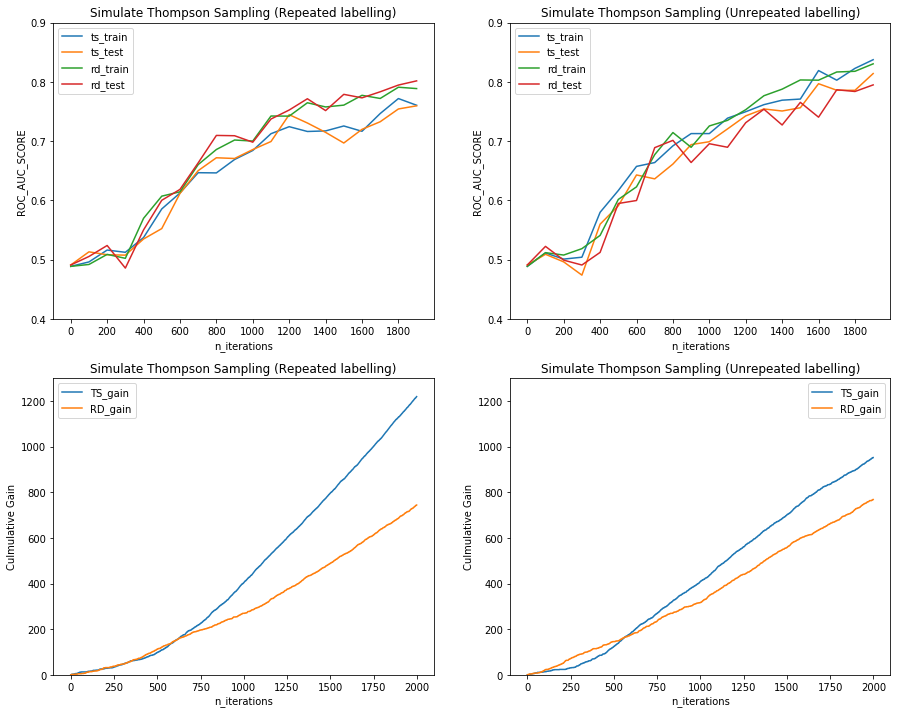

In [25]:
#with open ('outfile', 'rb') as fp:
#    results = pickle.load(fp)

plt.figure(figsize= (15,12))

# only plot 2000 iterations for the purpose of comparison with unrepeated labelling
plt.subplot(221)
plt.plot(results['TS_repeated_train_error_list'][:2000][::100], label = 'ts_train')
plt.plot(results['TS_repeated_test_error_list'][:2000][::100], label = 'ts_test')
plt.plot(results['RD_repeated_train_error_list'][:2000][::100], label = 'rd_train')
plt.plot(results['RD_repeated_test_error_list'][:2000][::100], label = 'rd_test')
plt.xticks(numpy.arange(20, step = 2), numpy.arange(2000)[::200])
plt.xlabel('n_iterations')
plt.ylabel('ROC_AUC_SCORE')
plt.ylim(0.4,0.9)
plt.title('Simulate Thompson Sampling (Repeated labelling)')
plt.legend()

plt.subplot(222)
plt.plot(results['TS_unrepeated_train_error_list'][::100], label = 'ts_train')
plt.plot(results['TS_unrepeated_test_error_list'][::100], label = 'ts_test')
plt.plot(results['RD_unrepeated_train_error_list'][::100], label = 'rd_train')
plt.plot(results['RD_unrepeated_test_error_list'][::100], label = 'rd_test')
plt.xticks(numpy.arange(20, step = 2), numpy.arange(2000)[::200])
plt.xlabel('n_iterations')
plt.ylabel('ROC_AUC_SCORE')
plt.ylim(0.4,0.9)
plt.title('Simulate Thompson Sampling (Unrepeated labelling)')
plt.legend()

plt.subplot(223)
plt.plot(numpy.cumsum(results['TS_repeated_gain'][:2000]), label = 'TS_gain')
plt.plot(numpy.cumsum(results['RD_repeated_gain'][:2000]), label = 'RD_gain')
plt.ylabel('Culmulative Gain')
plt.xlabel('n_iterations')
plt.ylim(0,1300)
plt.title('Simulate Thompson Sampling (Repeated labelling)')
plt.legend()

plt.subplot(224)
plt.plot(numpy.cumsum(results['TS_unrepeated_gain']), label = 'TS_gain')
plt.plot(numpy.cumsum(results['RD_unrepeated_gain']), label = 'RD_gain')
plt.ylabel('Culmulative Gain')
plt.xlabel('n_iterations')
plt.ylim(0,1300)
plt.title('Simulate Thompson Sampling (Unrepeated labelling)')
plt.legend()
plt.savefig('comparison.png')